# Importing modules

In [1]:
import operator
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from IPython.display import display
import IPython.core.display as di
from IPython.core.interactiveshell import InteractiveShell
from include.config import CleaningConfig, PlottingConfig, NotebookConfig
from include.counting import get_count, get_percentage
from include.plotting import get_plot, display_side_by_side
from include.likertScalePlot import likert_scale
from include.textCleaning import wordcloud

In [2]:
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000) 
InteractiveShell.ast_node_interactivity = "all" 

This text is used to hide the code cell when exported in html

In [3]:
di.display_html('<script>jQuery(function() {if (jQuery("body.notebook_app").length == 0) { jQuery(".input_area").toggle(); jQuery(".prompt").toggle();}});</script>', raw=True)

In [4]:
get_ipython().magic('matplotlib inline')  # Activate that line to use in Jupyter 
matplotlib.rcParams['figure.figsize'] = (15.0, 8.0)

# Loading dataset
To find the total number of participants, we took all submissions and then removed those from people who were outside the country (see question 1) and those from people who had not completed the first ten questions (i.e. those people who did not complete the first page of the survey).

In [5]:
df =  pd.read_csv('./2017/nl/data/cleaned_data.csv')

The total of participant after cleaning the dataset. Remove all participants that have not completed the survey passed the first pages and all participants who are not from the country

In [6]:
len(df)

77

# Section 1. Social demographics
In this section, we determine some information about the demographics of the respondents: country of work, gender, salary, educational level, age.

## Country of work
The data was cleaned to remove all participants that were not working in the Netherlands

### In which country do you work?

In [7]:
v_to_count, filename  = get_count(df, ['socio1. In which country do you work?'], "one choice", "./../survey_creation/2017/nl/listAnswers/countries.csv", "False", "./2017/nl/output/")

In [8]:
perc_to_count = get_percentage(v_to_count, filename)

In [9]:
display_side_by_side(v_to_count,perc_to_count)

,Count,Percentage
In which country do you work?,,
Netherlands,77,100.0


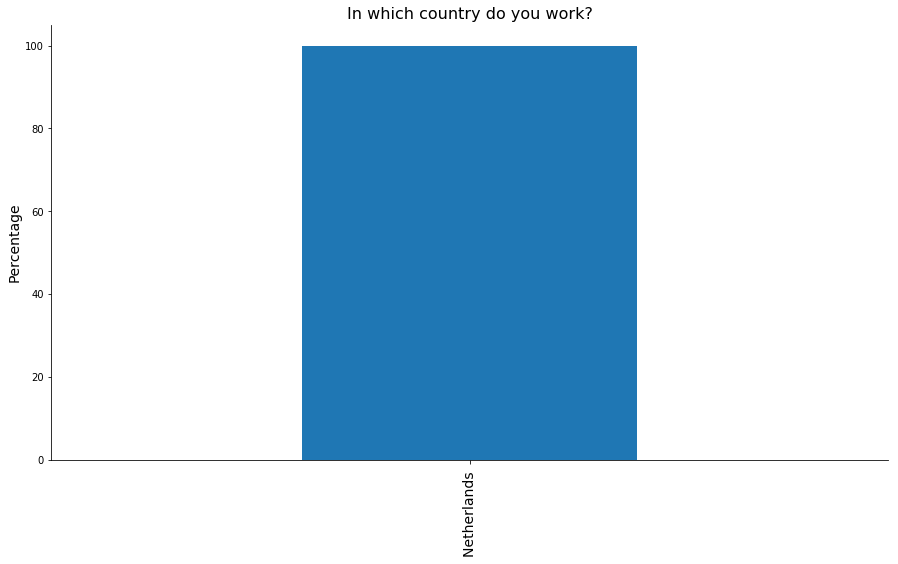

In [10]:
_ = get_plot(perc_to_count, "one choice")

## Gender
Their is a clear gender imbalance in the RSE community in the Netherlands. It is predominately *male* (89%). Only 7% of the participants describe their gender as *female*, while 4% *prefer not to say*.

### Please select your gender

In [11]:
v_to_count, filename  = get_count(df, ['socio2. Please select your gender'], "one choice", "./../survey_creation/2017/nl/listAnswers/gender.csv", "False", "./2017/nl/output/")

In [12]:
perc_to_count = get_percentage(v_to_count, filename)

In [13]:
display_side_by_side(v_to_count,perc_to_count)

,Count,Percentage
Please select your gender,,
Male,63,89.0
Female,5,7.0
Prefer not to say,3,4.0
NaN,6,NaN


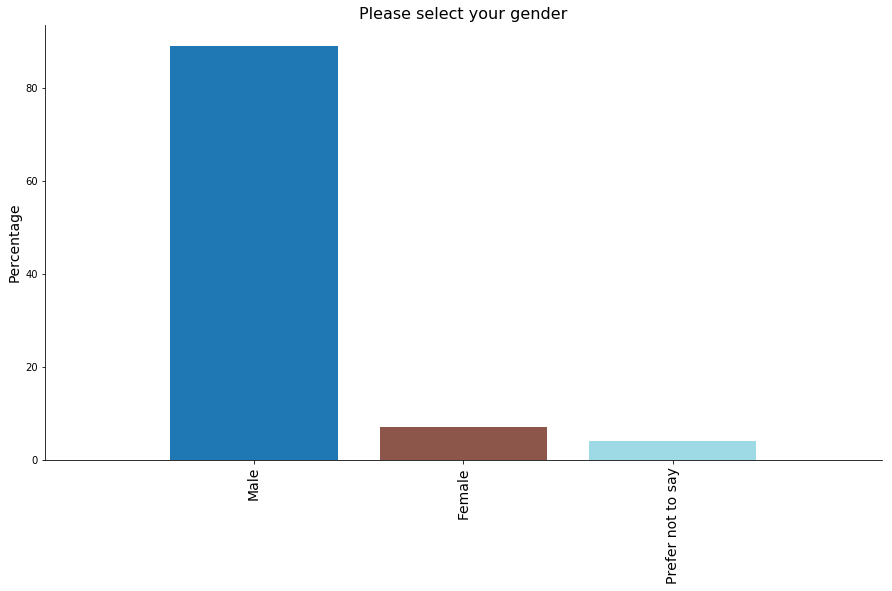

In [14]:
_ = get_plot(perc_to_count, "one choice")

## Age
The majority of RSEs fall within two ranges of ages the *25 to 34 years* and the *35 to 44 years* (both 42%). The representation of older or younger range is almost inexistant. 

### Please select your age

In [15]:
v_to_count, filename  = get_count(df, ['socio3. Please select your age'], "likert", "./../survey_creation/2017/nl/listAnswers/age.csv", "True", "./2017/nl/output/")

In [16]:
perc_to_count = get_percentage(v_to_count, filename)

In [17]:
display_side_by_side(v_to_count,perc_to_count)

,Count,Percentage
Please select your age,,
18 to 24 years,NaN,0.0
25 to 34 years,30.0,42.0
35 to 44 years,30.0,42.0
45 to 54 years,8.0,11.0
55 to 64 years,3.0,4.0
Age 65 or older,NaN,0.0


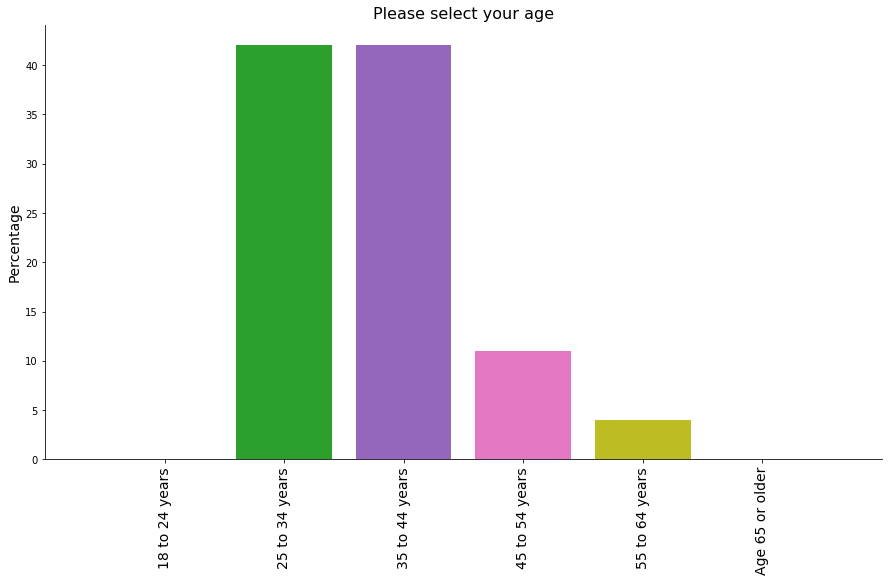

In [18]:
_ = get_plot(perc_to_count, "likert")

## Salary

We asked the participants to give us the range of salary they are paid. 17% of the participants prefered not to say. However, the most common salary in The Netherlands for the participants is between 44.000 and 49.999 euros (19%) with a concentration of the other salaries around this range. However, 4% earn less than 27.499 euros and 15% more than 55.000 euros.

### Please select the range of your salary

In [19]:
v_to_count, filename  = get_count(df, ['socio4. Please select the range of your salary'], "likert", "./../survey_creation/2017/nl/listAnswers/salary_nl.csv", "Tue", "./2017/nl/output/")

In [20]:
perc_to_count = get_percentage(v_to_count, filename)

In [21]:
display_side_by_side(v_to_count,perc_to_count)

,Count,Percentage
Please select the range of your salary,,
Less than 27.499 EUR,3.0,4.0
Between 27.500 and 32.999 EUR,2.0,3.0
Between 33.000 and 38.499 EUR,10.0,14.0
Between 38.500 and 43.999 EUR,10.0,14.0
Between 44.000 and 49.999 EUR,13.0,19.0
Between 50.000 and 54.999 EUR,9.0,13.0
Between 55.000 and 65.999 EUR,5.0,7.0
Between 66.000 and 76.999 EUR,5.0,7.0
Between 77.000 and 109.999 EUR,1.0,1.0


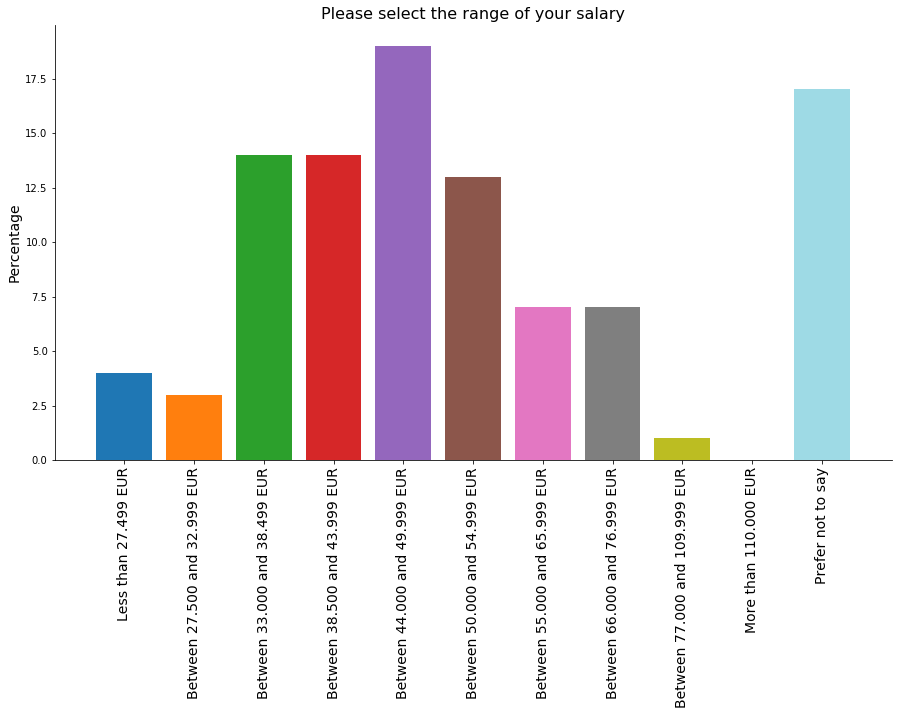

In [22]:
_ = get_plot(perc_to_count, "likert")

## Qualifications
The highest proportion of RSEs holds a PhD (56%) add 39% a master degree. The remaining participants have a Bachelor. 

Most RSEs derive from a background in *Computer Science* (26%) or *Physics and Astronomy* (23%). The third most often field is *Biological Sciences* (12%). There is a significant reduction in numbers in the next most popular background *Chemistry* (9%).

### What is the highest qualification you have obtained?

In [23]:
v_to_count, filename  = get_count(df, ['edu1. What is the highest qualification you have obtained?'], "one choice", "./../survey_creation/2017/nl/listAnswers/education_nl.csv", "False", "./2017/nl/output/")

In [24]:
perc_to_count = get_percentage(v_to_count, filename)

In [25]:
display_side_by_side(v_to_count,perc_to_count)

,Count,Percentage
What is the highest qualification you have obtained?,,
PhD,43,56.0
WO (Wetenschappelijk onderwijs) Master,29,38.0
WO (Wetenschappelijk onderwijs) Bachelor,2,3.0
HBO (Hoger beroepsonderwijs) Bachelor,2,3.0
HBO (Hoger beroepsonderwijs) Master,1,1.0


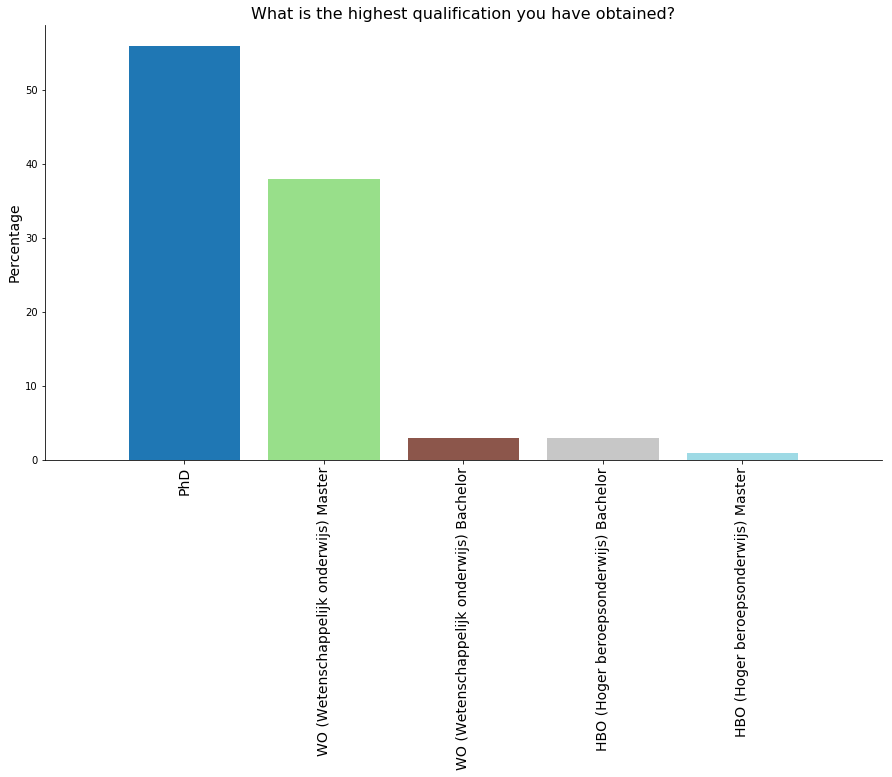

In [26]:
_ = get_plot(perc_to_count, "one choice")

### In which subject is your highest academic qualification?

In [27]:
v_to_count, filename  = get_count(df, ['edu2. In which subject is your highest academic qualification?'], "one choice", "./../survey_creation/2017/nl/listAnswers/academic_field.csv", "False", "./2017/nl/output/")

In [28]:
perc_to_count = get_percentage(v_to_count, filename)

In [29]:
display_side_by_side(v_to_count,perc_to_count)

,Count,Percentage
In which subject is your highest academic qualification?,,
Computer Science,20,26.0
Physics and Astronomy,18,23.0
Biological Sciences,9,12.0
Other,7,9.0
Chemistry,7,9.0
Geography & Environmental Sciences,4,5.0
Communication & Media Studies,3,4.0
Mathematics,2,3.0
History,2,3.0


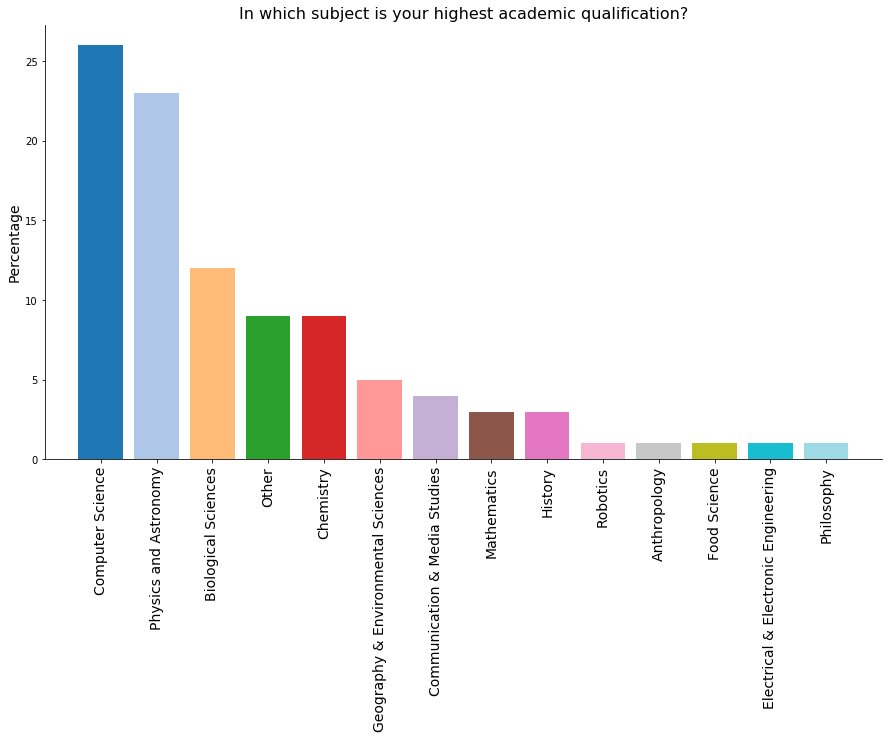

In [30]:
_ = get_plot(perc_to_count, "one choice")

# Section 2: Questions about coding

In this section we investigate the relationship between RSEs and the code they develop.

As expected, the vast majority of RSEs (97%) write code. They are, in vast majority, writing code for other people. Only 6% of them write code for themselves, and 84% for 2 or more people

However, despite the majority of them writing code, only 65% consider themselves as *professional software developer*. This is a low number when we consider the average time of developing software (12 years) and that they are mainly developing software for others.

Unsurprisingly, RSEs spend the majority of their time coding. They are almost exclusively doing that. 

### Do you write code as part of your job?

In [31]:
v_to_count, filename  = get_count(df, ['rse1. Do you write code as part of your job?'], "y/n/na", "./../survey_creation/2017/nl/listAnswers/.csv", "False", "./2017/nl/output/")

In [32]:
perc_to_count = get_percentage(v_to_count, filename)

In [33]:
display_side_by_side(v_to_count,perc_to_count)

,Yes [Count],No [Count],Yes [Percentage],No [Percentage]
Do you write code as part of your job?,,,,
Do you write code as part of your job?,75,2,97.0,3.0


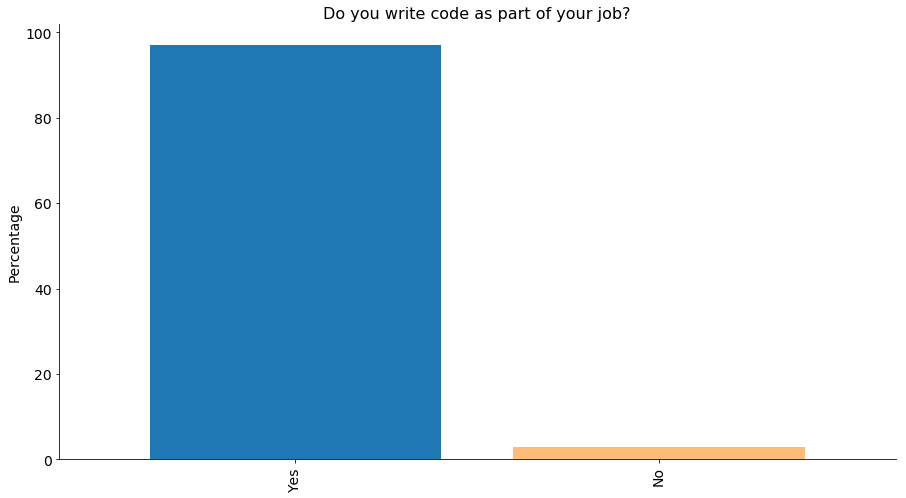

In [34]:
_ = get_plot(perc_to_count, "y/n/na")

### Who uses the code that you write?

In [35]:
v_to_count, filename  = get_count(df, ['rse3[SQ001]. Who uses the code that you write? []'], "likert", "./../survey_creation/2017/nl/listAnswers/likert_usage_5.csv", "True", "./2017/nl/output/")

In [36]:
perc_to_count = get_percentage(v_to_count, filename)

In [37]:
display_side_by_side(v_to_count,perc_to_count)

,Count,Percentage
Who uses the code that you write?,,
0 - Mostly me,5,6.0
1,5,6.0
2,15,19.0
3,16,21.0
4,17,22.0
5 - Mostly other people,19,25.0


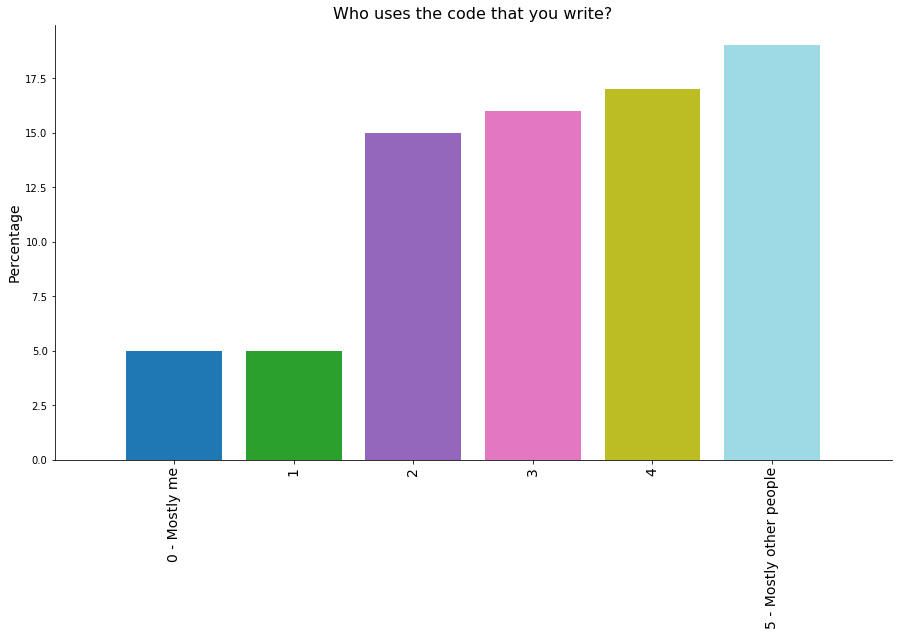

In [38]:
_ = get_plot(v_to_count, "likert")

### Do you consider yourself a professional software developer?

In [39]:
v_to_count, filename  = get_count(df, ['soft2can. Do you consider yourself a professional software developer?'], "y/n/na", "./../survey_creation/2017/nl/listAnswers/.csv", "False", "./2017/nl/output/")

In [40]:
perc_to_count = get_percentage(v_to_count, filename)

In [41]:
display_side_by_side(v_to_count,perc_to_count)

,Yes [Count],No [Count],Yes [Percentage],No [Percentage]
Do you consider yourself a professional software developer?,,,,
Do you consider yourself a professional software developer?,50,27,65.0,35.0


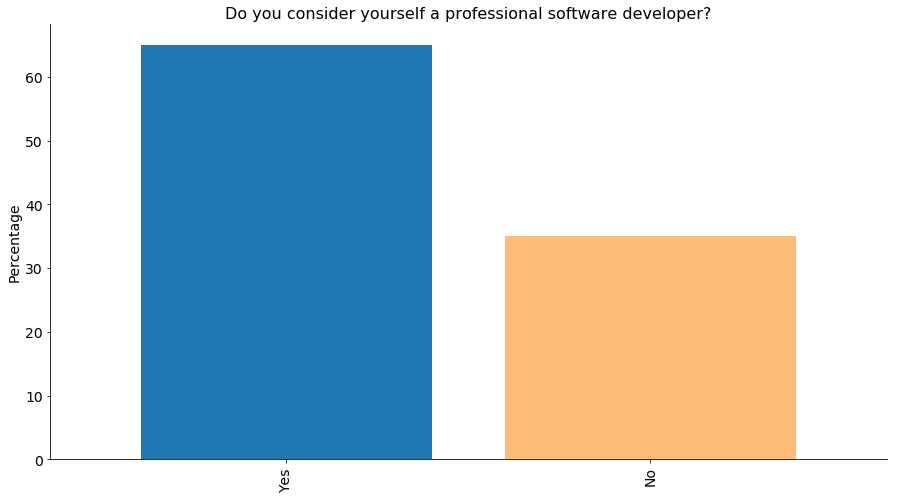

In [42]:
_ = get_plot(perc_to_count, "y/n/na")

### How many years of software development experience do you have?

In [43]:
v_to_count, filename  = get_count(df, ['soft1can. How many years of software development experience do you have?'], "freenumeric", "./../survey_creation/2017/nl/listAnswers/.csv", "False", "./2017/nl/output/")

       soft1can. How many years of software development experience do you have?
count                                          77.000000                       
mean                                           12.389610                       
std                                             8.421707                       
min                                             0.000000                       
25%                                             6.000000                       
50%                                            10.000000                       
75%                                            20.000000                       
max                                            35.000000                       


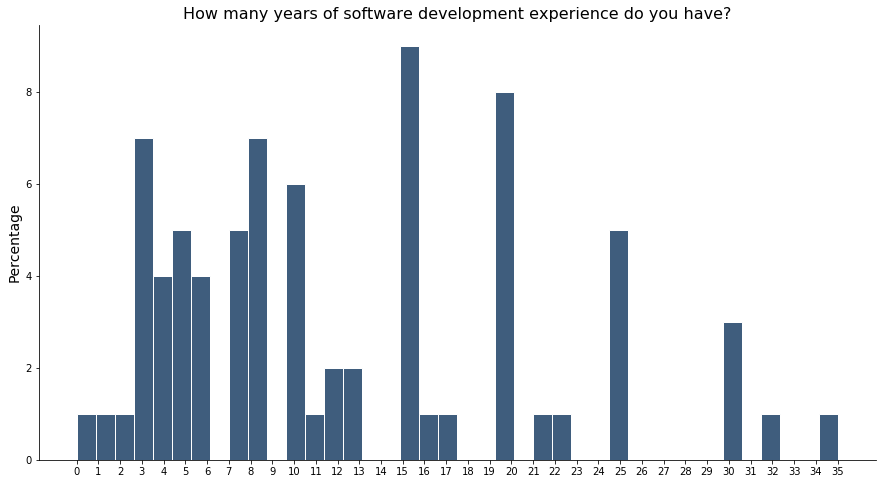

In [44]:
_ = get_plot(v_to_count, "freenumeric")

### In an average month, how much time do you spend on software development; In an average month, how much time do you spend on Research; In an average month, how much time do you spend on Management; In an average month, how much time do you spend on Teaching; In an average month, how much time do you spend on Other activities

In [45]:
v_to_count, filename  = get_count(df, ['likert0[time1can]. [In an average month, how much time do you spend on software development]', 'likert0[time2can]. [In an average month, how much time do you spend on Research]', 'likert0[time3can]. [In an average month, how much time do you spend on Management]', 'likert0[time4can]. [In an average month, how much time do you spend on Teaching]', 'likert0[time5can]. [In an average month, how much time do you spend on Other activities]'], "likert", "./../survey_creation/2017/nl/listAnswers/likert_time_10.csv", "False", "./2017/nl/output/")

In [46]:
display(v_to_count) 

,"In an average month, how much time do you spend on software development","In an average month, how much time do you spend on Research","In an average month, how much time do you spend on Management","In an average month, how much time do you spend on Teaching","In an average month, how much time do you spend on Other activities"
Spending time,,,,,
1 (None at all),2,8.0,18.0,46.0,11.0
2,6,25.0,27.0,26.0,36.0
3,6,14.0,15.0,1.0,20.0
4,5,11.0,8.0,1.0,7.0
5,10,8.0,NaN,2.0,1.0
6,14,3.0,4.0,1.0,1.0
7,13,5.0,1.0,NaN,NaN
8,11,3.0,3.0,NaN,1.0
9,7,NaN,NaN,NaN,NaN


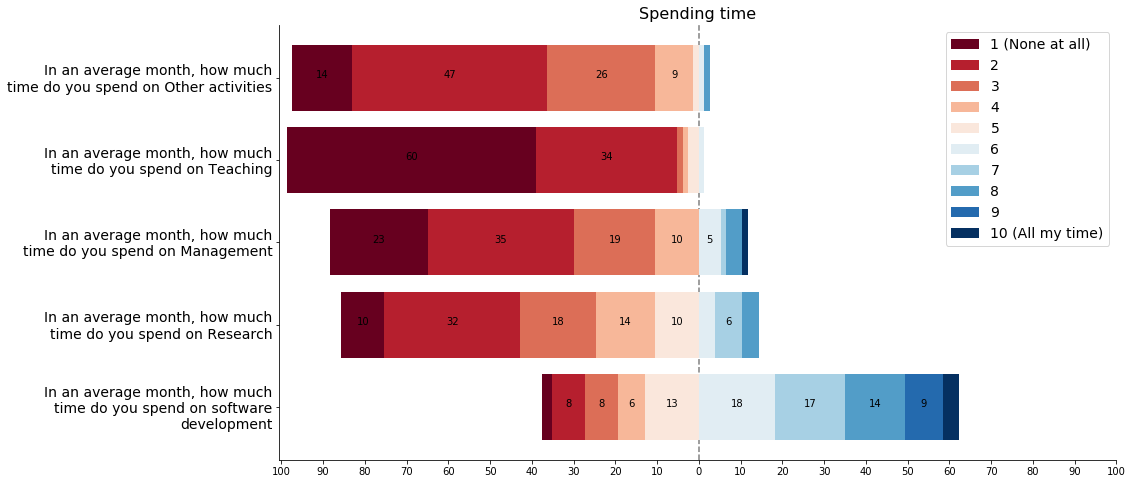

In [47]:
_ = get_plot(v_to_count, "likert")

# Section 3. Questions about employment
48% of RSEs work within a university and 38% for a Research Institute. They are only 8% to work for Private company or other type of organisation. When we ask them from which university they work, the Leiden University has the most answers (20%), followed by Radboudumc, Radboud Universitair Medisch Centrum (14%) and by Utrecht University (11%). 
The same question applied for organisation they work for has a majority of Netherlands eScience Center (52%) and a variety of marginal organisation (in terms of answers). 

About the job title, 26 participants mention that their official job title differs from the one they are actually using. Both lists, the official and the job title they use, are available below. 


At the question about the field where they work, the participants mainly answered *Computer Science* (20%), followed by *Biological Sciences* (10%)  and *Physics and Astronomy* (10%). This top three remain the same as for their education. However, the lower percent for each of them is explained by a much larger variety of disciplines where they currently work, underlying the interdisciplinary aspect of RSEs. 

### What type of organisation do you work for?

In [48]:
v_to_count, filename  = get_count(df, ['currentEmp1. What type of organisation do you work for?'], "one choice", "./../survey_creation/2017/nl/listAnswers/type_organisation_nl.csv", "False", "./2017/nl/output/")

In [49]:
perc_to_count = get_percentage(v_to_count, filename)

In [50]:
display_side_by_side(v_to_count,perc_to_count)

,Count,Percentage
What type of organisation do you work for?,,
University / University Medical Center / Applied University (HBO),37,48.0
Research Institute (Onderzoeksinstituut / Publieke Kennisorganisatie),30,39.0
Private Company,6,8.0
Other,4,5.0


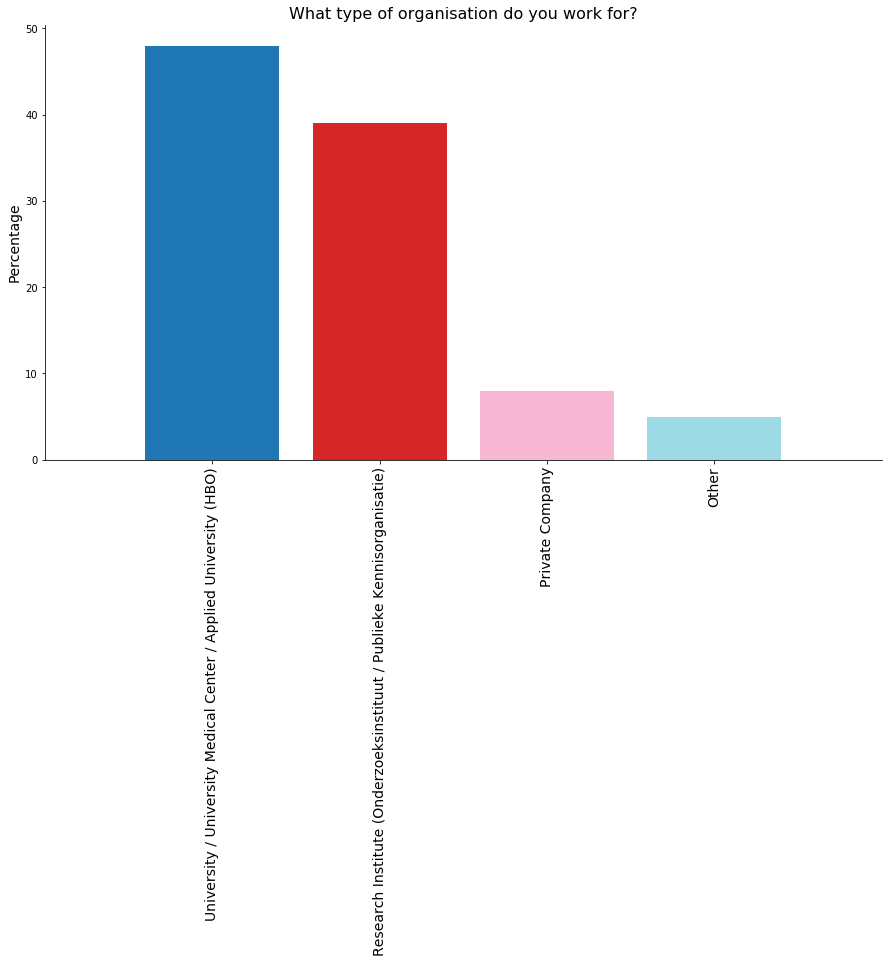

In [51]:
_ = get_plot(perc_to_count, "one choice")

### Which University / Medical Center / Applied University (HBO)?

In [52]:
v_to_count, filename  = get_count(df, ['currentEmp2. Which University / Medical Center / Applied University (HBO)?'], "one choice", "./../survey_creation/2017/nl/listAnswers/universities_nl.csv", "False", "./2017/nl/output/")

In [53]:
perc_to_count = get_percentage(v_to_count, filename)

In [54]:
display_side_by_side(v_to_count,perc_to_count)

,Count,Percentage
Which University / Medical Center / Applied University (HBO)?,,
Leiden University,7,20.0
"Radboudumc, Radboud Universitair Medisch Centrum",5,14.0
Utrecht University,4,11.0
University of Amsterdam,3,9.0
"UMCG, Universitair Medisch Centrum Groningen",3,9.0
VU University Amsterdam,3,9.0
Wageningen University,2,6.0
"LUMC, Leids Universitair Medisch Centrum",2,6.0
"UMC Utrecht, Universitair Medisch Centrum Utrecht",2,6.0


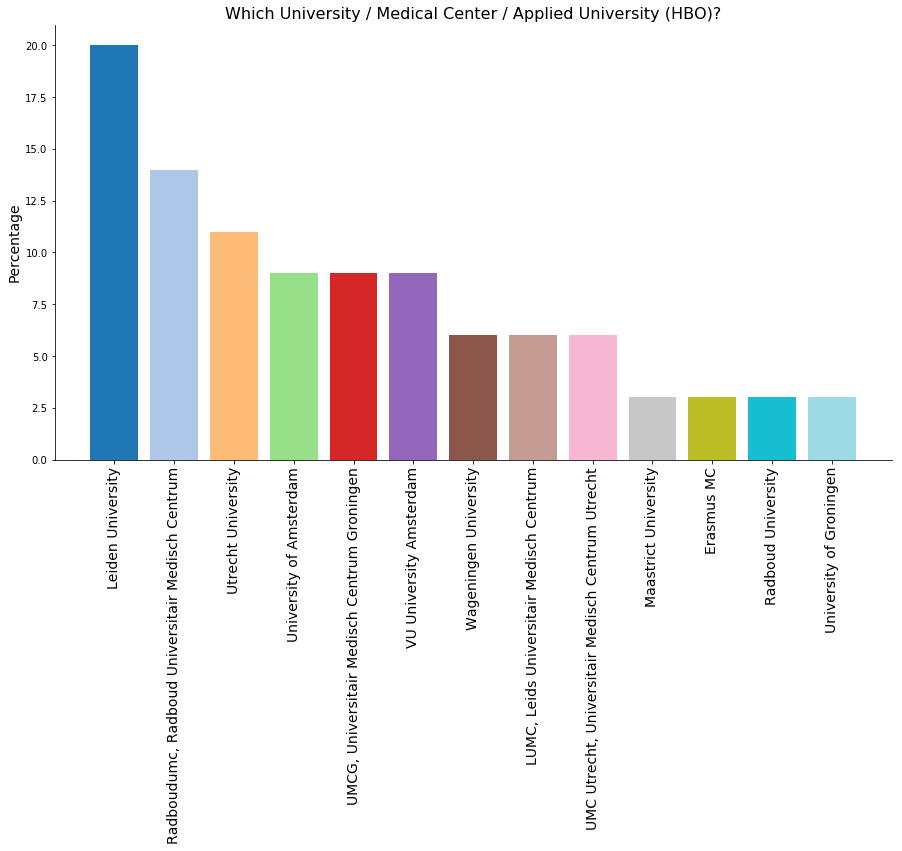

In [55]:
_ = get_plot(perc_to_count, "one choice")

### Which organisation do you work for?

In [56]:
v_to_count, filename  = get_count(df, ['currentEmp4. Which organisation do you work for?'], "one choice", "./../survey_creation/2017/nl/listAnswers/organisations_nl.csv", "False", "./2017/nl/output/")

In [57]:
perc_to_count = get_percentage(v_to_count, filename)

In [58]:
display_side_by_side(v_to_count,perc_to_count)

,Count,Percentage
Which organisation do you work for?,,
Netherlands eScience Center,15,52.0
Huygens ING,2,7.0
Wageningen Research (DLO),2,7.0
ASTRON,2,7.0
SRON,1,3.0
Deltares,1,3.0
KNMI,1,3.0
Westerdijk Fungal Biodiversity Institute,1,3.0
AMOLF,1,3.0


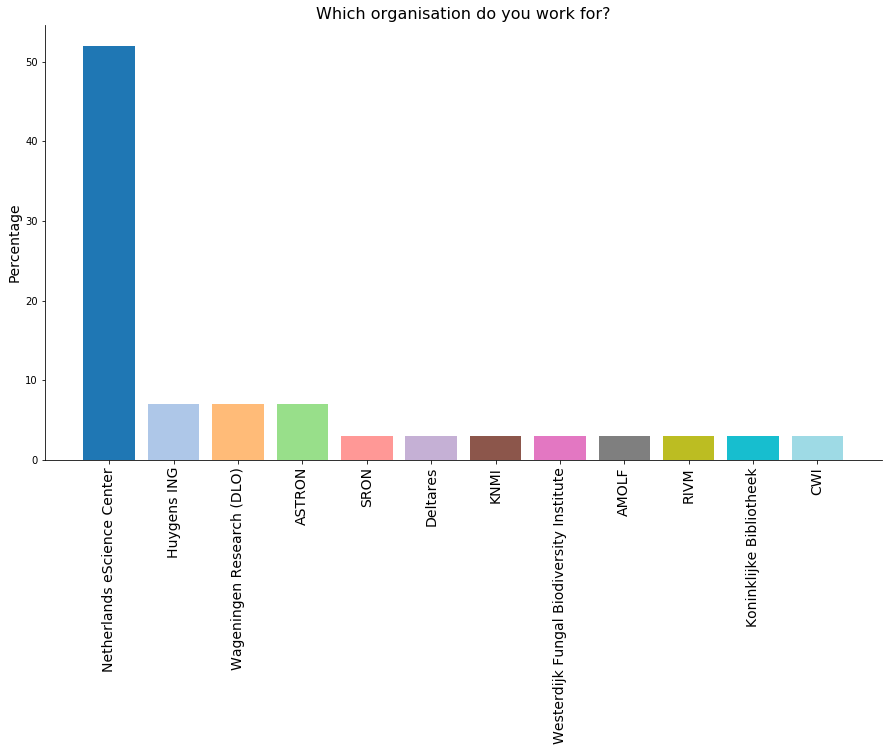

In [59]:
_ = get_plot(perc_to_count, "one choice")

### Which company do you work for?

In [60]:
 wc = wordcloud(df, ['currentEmp20. Which company do you work for?'])

(-0.5, 1499.5, 799.5, -0.5)

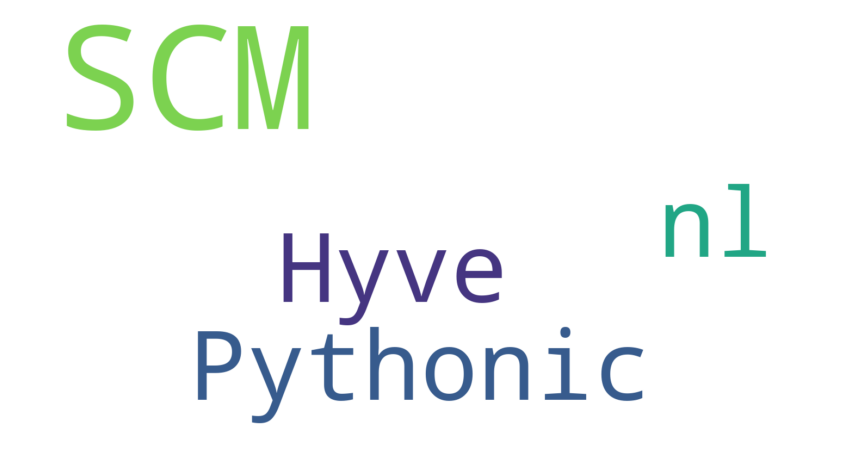

In [61]:
 plt.imshow(wc, interpolation='bilinear')
 plt.axis("off")

### What is your official job title?

In [62]:
data = df['currentEmp5. What is your official job title?'].dropna()
titles = [z.replace('/', ' ').replace(';', ' ').strip().lower() for z in data]
titles = [ ''.join(i for i in s if not i.isdigit()).strip() for s in titles]
print('There are {} propositions'.format(len(titles)))

There are 75 propositions


In [63]:
results = dict()
for i in titles:
    results[str(i).lower()] = results.get(str(i).lower(), 0)+1
results = sorted(results.items(), key=operator.itemgetter(1),reverse=True)
for k in results:
    if len(k[0]) > 4:
        print(k[0].title(), k[1])

Escience Research Engineer 11
Scientific Programmer 4
Postdoc 3
Researcher 3
Research Engineer 3
Universitair Docent 2
Escience Coordinator 2
Scientific Software Developer 2
Phd Candidate 2
Software Engineer 2
Wetenschappelijke Programmeur 1
Research Software Engineer (Projectleider) 1
Senior Developer 1
Assistant Professor 1
Researcher E 1
Promovendus (Phd Student) 1
Research Software Engineer 1
Software Developer 1
Technical Lead 1
Senior Software Design Engineer A 1
Scientific Developer 1
Senior Scientist 1
Scientist 1
Promovendus 1
Scientific Researcher 1
Digital Scholarship Librarian 1
Head Centre For Digital Scholarship 1
Not Sure, Part Of 'Wetenschappelijk Personeel' I Think 1
Dlo Onderzoeker 1
Scientific Data Engineer 1
Research Advisor 1
Systems Software Engineer 1
Technical Support Assistant For Teaching And Research 1
Digital Preservation Researcher 1
Developer Ict 1
System Developer 1
Ict Project Manager  Consultant 1
Head Software Engineering 1
Escience Research  Engineer 

In [64]:
wc = wordcloud(df, ['currentEmp5. What is your official job title?'])

(-0.5, 1499.5, 799.5, -0.5)

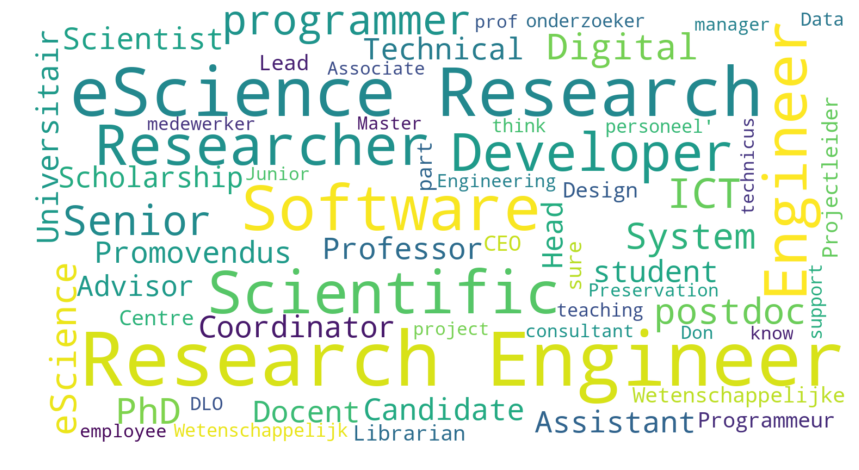

In [65]:
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")

### Are you known by a different job title? If so, please enter the job title you use

In [66]:
number_of_different_title = df['currentEmp6. Are you known by a different job title? If so, please enter the job title you use'].dropna()
print('Number of participants with a different title: {}'.format(len(number_of_different_title)))

Number of participants with a different title: 26


In [67]:
results = dict()
for i in number_of_different_title:
    results[str(i.lower())] = results.get(str(i.lower()), 0)+1
results = sorted(results.items(), key=operator.itemgetter(1),reverse=True)
for k in results:
    if len(k[0]) > 3:
        print(k[0].title(), k[1])

Software Developer 3
Scientific Programmer 3
Bioinformatician 2
Scientific Software Engineer 2
Research Group Leader 1
Sdc Developer 1
Escience Engineer 1
Senior Software Developer 1
Research Software Engineer 1
Wetenschappelikke Medewerker 1
Scientific Researcher & Research Software Engineer 1
I Describe Myself As A Scientific Programmer Generally 1
Food Safety Researcher 1
Data Scientist 1
Digital Historian 1
Head Of Center 1
Senior Software Engineer  1
Postdoc 1
Researcher 1
Software Engineer, Data Scientist 1


(-0.5, 1499.5, 799.5, -0.5)

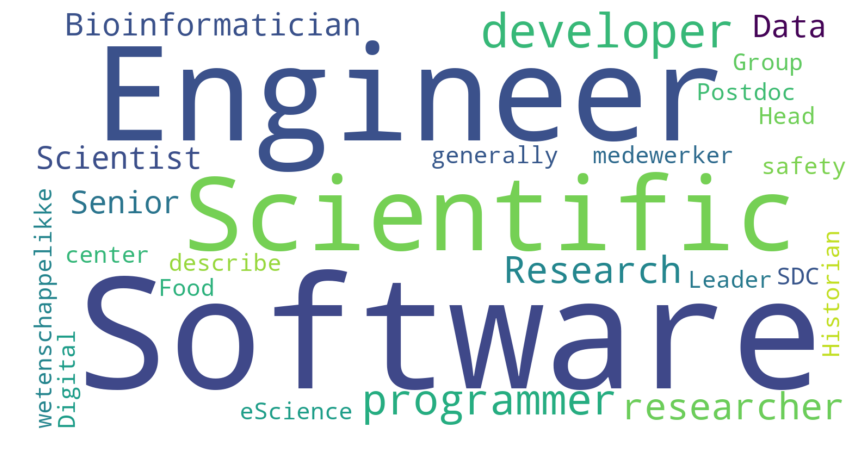

In [68]:
wc = wordcloud(df, ['currentEmp6. Are you known by a different job title? If so, please enter the job title you use'])
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")

### In which disciplines do you work (select as many as apply)

In [69]:
v_to_count, filename  = get_count(df, ['currentEmp13[1]. In which disciplines do you work (select as many as apply) [Accounting & Finance]', 'currentEmp13[2]. In which disciplines do you work (select as many as apply) [Aeronautical & Manufacturing Engineering]', 'currentEmp13[3]. In which disciplines do you work (select as many as apply) [Agriculture & Forestry]', 'currentEmp13[4]. In which disciplines do you work (select as many as apply) [American Studies]', 'currentEmp13[5]. In which disciplines do you work (select as many as apply) [Anatomy & Physiology]', 'currentEmp13[6]. In which disciplines do you work (select as many as apply) [Anthropology]', 'currentEmp13[7]. In which disciplines do you work (select as many as apply) [Architecture]', 'currentEmp13[8]. In which disciplines do you work (select as many as apply) [Art & Design]', 'currentEmp13[9]. In which disciplines do you work (select as many as apply) [Biological Sciences]', 'currentEmp13[10]. In which disciplines do you work (select as many as apply) [Business & Management Studies]', 'currentEmp13[11]. In which disciplines do you work (select as many as apply) [Chemical Engineering]', 'currentEmp13[12]. In which disciplines do you work (select as many as apply) [Chemistry]', 'currentEmp13[13]. In which disciplines do you work (select as many as apply) [Civil Engineering]', 'currentEmp13[14]. In which disciplines do you work (select as many as apply) [Classics & Ancient History]', 'currentEmp13[15]. In which disciplines do you work (select as many as apply) [Communication & Media Studies]', 'currentEmp13[16]. In which disciplines do you work (select as many as apply) [Complementary Medicine]', 'currentEmp13[17]. In which disciplines do you work (select as many as apply) [Computer Science]', 'currentEmp13[18]. In which disciplines do you work (select as many as apply) [Counselling]', 'currentEmp13[19]. In which disciplines do you work (select as many as apply) [Criminology]', 'currentEmp13[20]. In which disciplines do you work (select as many as apply) [Dentistry]', 'currentEmp13[21]. In which disciplines do you work (select as many as apply) [East & South Asian Studies]', 'currentEmp13[22]. In which disciplines do you work (select as many as apply) [Economics]', 'currentEmp13[23]. In which disciplines do you work (select as many as apply) [Education]', 'currentEmp13[24]. In which disciplines do you work (select as many as apply) [Electrical & Electronic Engineering]', 'currentEmp13[25]. In which disciplines do you work (select as many as apply) [English]', 'currentEmp13[26]. In which disciplines do you work (select as many as apply) [Fashion]', 'currentEmp13[27]. In which disciplines do you work (select as many as apply) [Food Science]', 'currentEmp13[28]. In which disciplines do you work (select as many as apply) [French]', 'currentEmp13[29]. In which disciplines do you work (select as many as apply) [Geography & Environmental Sciences]', 'currentEmp13[30]. In which disciplines do you work (select as many as apply) [Geology]', 'currentEmp13[31]. In which disciplines do you work (select as many as apply) [General Engineering]', 'currentEmp13[32]. In which disciplines do you work (select as many as apply) [German]', 'currentEmp13[33]. In which disciplines do you work (select as many as apply) [History]', 'currentEmp13[34]. In which disciplines do you work (select as many as apply) [History of Art, Architecture & Design]', 'currentEmp13[35]. In which disciplines do you work (select as many as apply) [Hospitality, Leisure, Recreation & Tourism]', 'currentEmp13[36]. In which disciplines do you work (select as many as apply) [Iberian Languages/Hispanic Studies]', 'currentEmp13[37]. In which disciplines do you work (select as many as apply) [Land & Property Management]', 'currentEmp13[38]. In which disciplines do you work (select as many as apply) [Law]', 'currentEmp13[39]. In which disciplines do you work (select as many as apply) [Librarianship & Information Management]', 'currentEmp13[40]. In which disciplines do you work (select as many as apply) [Linguistics]', 'currentEmp13[41]. In which disciplines do you work (select as many as apply) [Marketing]', 'currentEmp13[42]. In which disciplines do you work (select as many as apply) [Materials Technology]', 'currentEmp13[43]. In which disciplines do you work (select as many as apply) [Mathematics]', 'currentEmp13[44]. In which disciplines do you work (select as many as apply) [Mechanical Engineering]', 'currentEmp13[45]. In which disciplines do you work (select as many as apply) [Medicine]', 'currentEmp13[46]. In which disciplines do you work (select as many as apply) [Middle Eastern and African Studies]', 'currentEmp13[47]. In which disciplines do you work (select as many as apply) [Music]', 'currentEmp13[48]. In which disciplines do you work (select as many as apply) [Nursing]', 'currentEmp13[49]. In which disciplines do you work (select as many as apply) [Ophthalmics]', 'currentEmp13[50]. In which disciplines do you work (select as many as apply) [Pharmacology & Pharmacy]', 'currentEmp13[51]. In which disciplines do you work (select as many as apply) [Philosophy]', 'currentEmp13[52]. In which disciplines do you work (select as many as apply) [Physics and Astronomy]', 'currentEmp13[53]. In which disciplines do you work (select as many as apply) [Physiotherapy]', 'currentEmp13[54]. In which disciplines do you work (select as many as apply) [Politics]', 'currentEmp13[55]. In which disciplines do you work (select as many as apply) [Psychology]', 'currentEmp13[56]. In which disciplines do you work (select as many as apply) [Robotics]', 'currentEmp13[57]. In which disciplines do you work (select as many as apply) [Russian & East European Languages]', 'currentEmp13[58]. In which disciplines do you work (select as many as apply) [Social Policy]', 'currentEmp13[59]. In which disciplines do you work (select as many as apply) [Social Work]', 'currentEmp13[60]. In which disciplines do you work (select as many as apply) [Sociology]', 'currentEmp13[61]. In which disciplines do you work (select as many as apply) [Sports Science]', 'currentEmp13[62]. In which disciplines do you work (select as many as apply) [Theology & Religious Studies]', 'currentEmp13[63]. In which disciplines do you work (select as many as apply) [Town & Country Planning and Landscape Design]', 'currentEmp13[64]. In which disciplines do you work (select as many as apply) [Veterinary Medicine]', 'currentEmp13[65]. In which disciplines do you work (select as many as apply) [Youth Work]'], "multiple choices", "./../survey_creation/2017/nl/listAnswers/academic_field.csv", "False", "./2017/nl/output/")

In [70]:
perc_to_count = get_percentage(v_to_count, filename)

In [71]:
display_side_by_side(v_to_count,perc_to_count)

,Count,Percentage
In which disciplines do you work (select as many as apply),,
Computer Science,41,20.0
Biological Sciences,22,11.0
Physics and Astronomy,20,10.0
Medicine,12,6.0
Linguistics,11,5.0
Chemistry,11,5.0
History,10,5.0
Geography & Environmental Sciences,10,5.0
Librarianship & Information Management,6,3.0


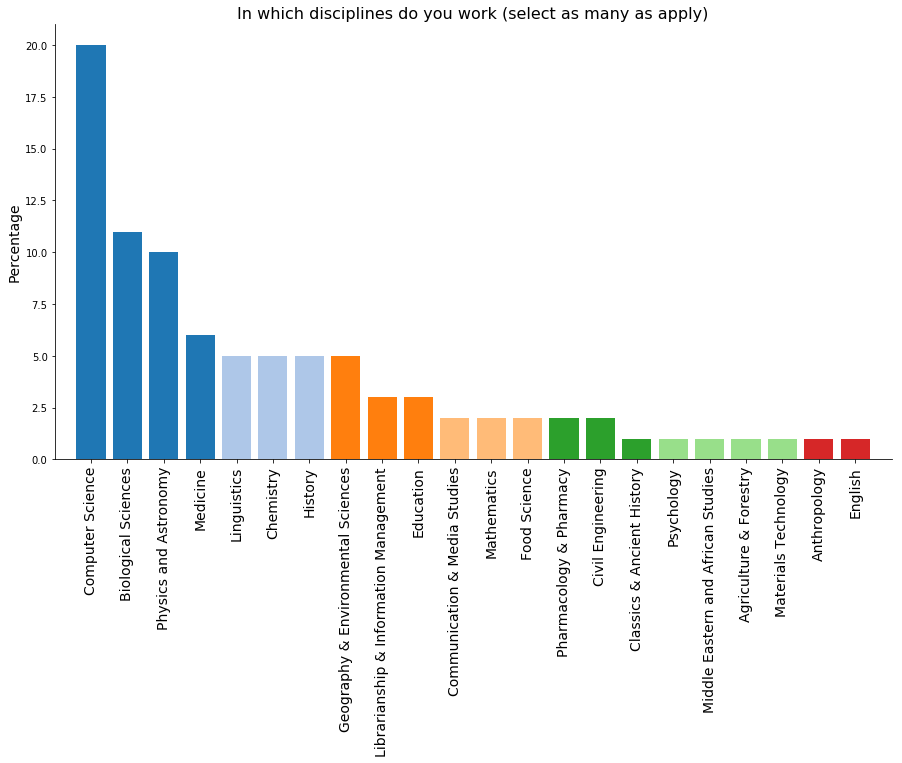

In [72]:
_ = get_plot(perc_to_count, "multiple choices")

# Section 4. Questions about the type of contract

Type of contracts and funding are important to understand the situation of RSEs and if they have stable position in academia.
A vast majority of participants have a full time job (74%) and half of them have a permanent position. The average length of contract duration is more or less 2 years for the participants that does not have a permanent position.


### Do you work full time (36 hours or more) or part time?

In [73]:
v_to_count, filename  = get_count(df, ['currentEmp12. Do you work full time (36 hours or more) or part time?'], "one choice", "./../survey_creation/2017/nl/listAnswers/type_hours.csv", "False", "./2017/nl/output/")

In [74]:
perc_to_count = get_percentage(v_to_count, filename)

In [75]:
display_side_by_side(v_to_count,perc_to_count)

,Count,Percentage
Do you work full time (36 hours or more) or part time?,,
Full time,57,74.0
Part time,20,26.0


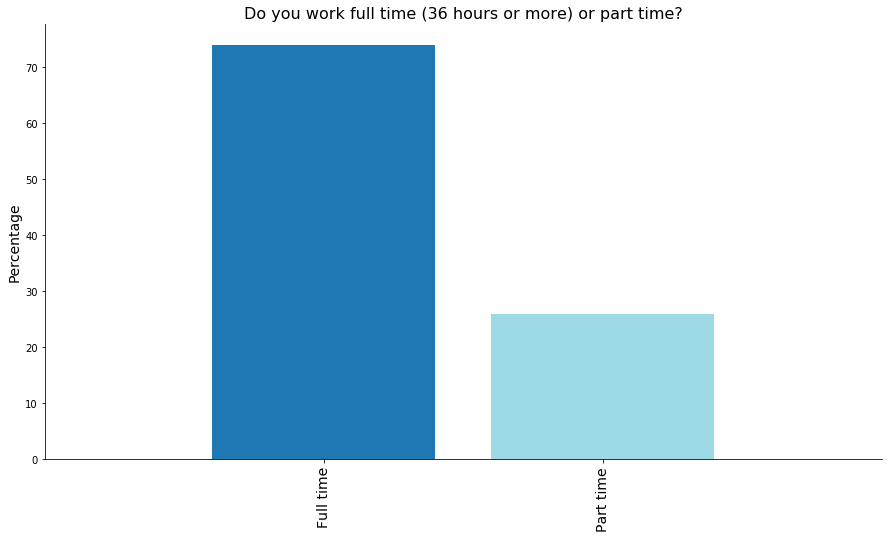

In [76]:
_ = get_plot(perc_to_count, "one choice")

### What type of contract are you employed on?

In [77]:
v_to_count, filename  = get_count(df, ['currentEmp10. What type of contract are you employed on?'], "one choice", "./../survey_creation/2017/nl/listAnswers/type_contract_nl.csv", "False", "./2017/nl/output/")

In [78]:
perc_to_count = get_percentage(v_to_count, filename)

In [79]:
display_side_by_side(v_to_count,perc_to_count)

,Count,Percentage
What type of contract are you employed on?,,
Permanent,50,65.0
Fixed term,26,34.0
Other,1,1.0


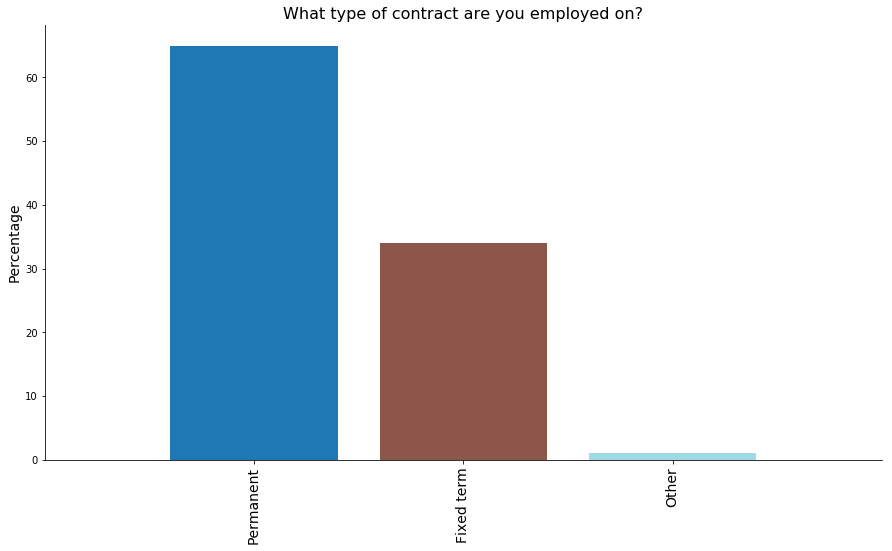

In [80]:
_ = get_plot(perc_to_count, "one choice")

### What is the duration of your current contract?

In [81]:
v_to_count, filename  = get_count(df, ['currentEmp11. What is the duration of your current contract? (in years)'], "freenumeric", "./../survey_creation/2017/nl/listAnswers/.csv", "False", "./2017/nl/output/")

       currentEmp11. What is the duration of your current contract? (in years)
count                                          26.000000                      
mean                                            2.284615                      
std                                             1.047928                      
min                                             0.400000                      
25%                                             2.000000                      
50%                                             2.000000                      
75%                                             3.000000                      
max                                             4.000000                      


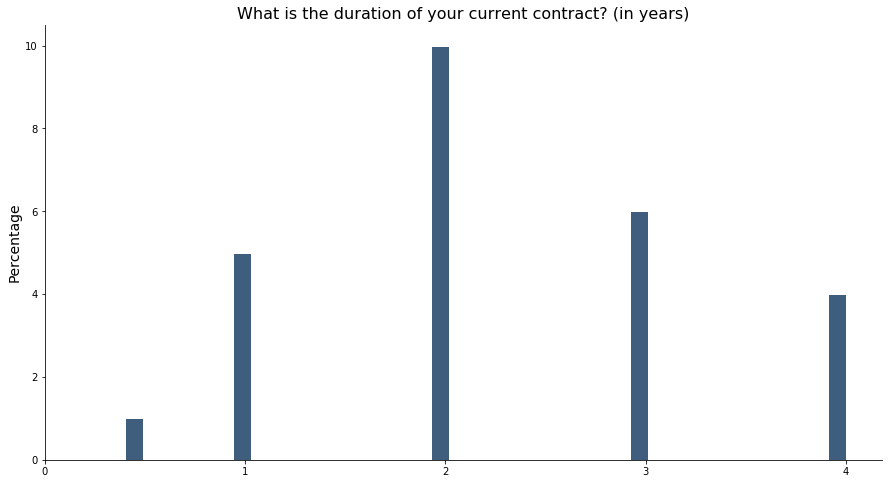

In [82]:
_ = get_plot(v_to_count, "freenumeric")

# Section 5. Collaboration and training

RSEs do not work for themselves, their role involves writing code that is used by others (as seen in section 2), but the collaboration can take other forms. 
On average they work on 4 different projects at the same time.

RSEs have programming skills that is not necessarily shared within their field. Therefore, they can train other researchers to develop some best practices or learn how to program more efficiently. 59% of them participate to such training. They are not teaching directly to students (as seen in section 2) but transferring skills is an important aspect of their job. In average, they do training twice a year. These trainings are more often done under the form of workshop than traditional teaching. A type of training probably more adapted to teach computing skills.

## Collaboration

### How many software projects are you currently involved in?

In [83]:
v_to_count, filename  = get_count(df, ['proj1can. How many software projects are you currently involved in?'], "freenumeric", "./../survey_creation/2017/nl/listAnswers/.csv", "False", "./2017/nl/output/")

       proj1can. How many software projects are you currently involved in?
count                                           75.00000                  
mean                                             4.40000                  
std                                              6.72229                  
min                                              1.00000                  
25%                                              2.00000                  
50%                                              3.00000                  
75%                                              4.00000                  
max                                             50.00000                  


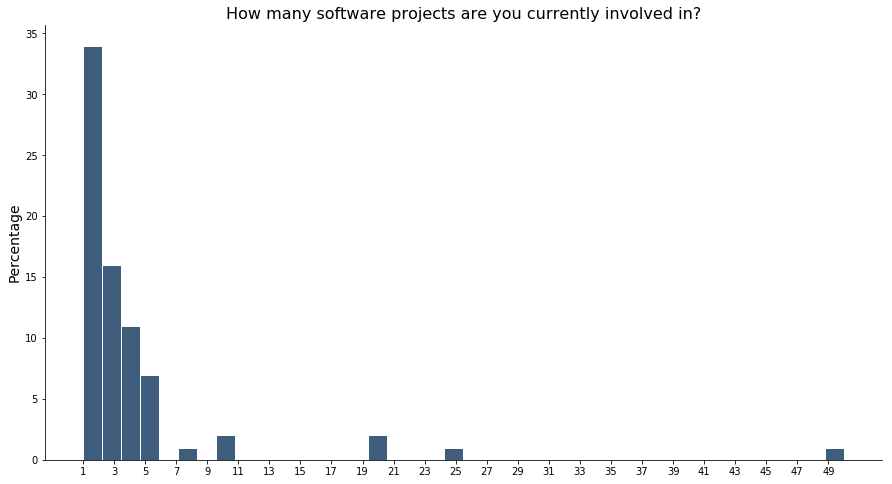

In [84]:
_ = get_plot(v_to_count, "freenumeric")

## Training

### Have you ever trained researchers in computational techniques?

In [85]:
v_to_count, filename  = get_count(df, ['train1. Have you ever trained researchers in computational techniques?'], "y/n/na", "./../survey_creation/2017/nl/listAnswers/.csv", "False", "./2017/nl/output/")

In [86]:
perc_to_count = get_percentage(v_to_count, filename)

In [87]:
display_side_by_side(v_to_count,perc_to_count)

,Yes [Count],No [Count],NaN value,Yes [Percentage],No [Percentage]
Have you ever trained researchers in computational techniques?,,,,,
Have you ever trained researchers in computational techniques?,44,31,2,59.0,41.0


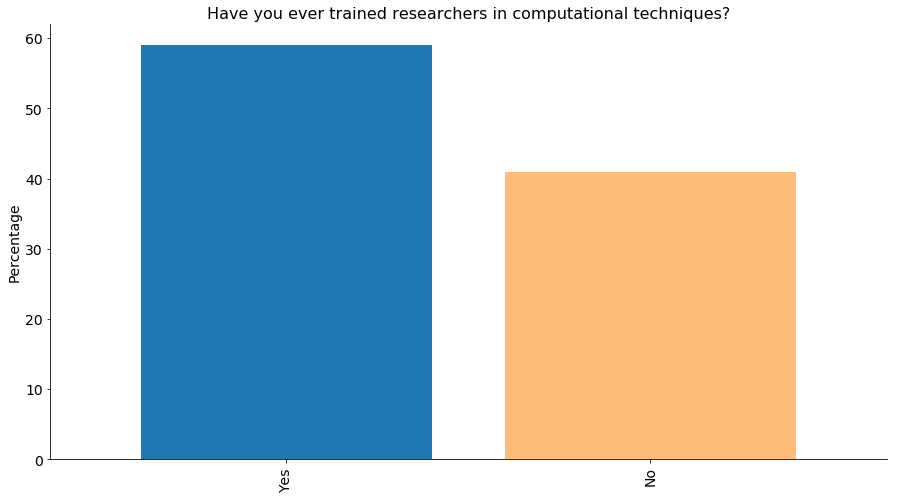

In [88]:
_ = get_plot(perc_to_count, "y/n/na")

### On average, how many times a year do you take part in providing training?

In [89]:
v_to_count, filename  = get_count(df, ['train2. On average, how many times a year do you take part in providing training?'], "freenumeric", "./../survey_creation/2017/nl/listAnswers/.csv", "False", "./2017/nl/output/")

       train2. On average, how many times a year do you take part in providing training?
count                                          44.000000                                
mean                                            2.822727                                
std                                             4.073332                                
min                                             0.000000                                
25%                                             1.000000                                
50%                                             2.000000                                
75%                                             3.000000                                
max                                            25.000000                                


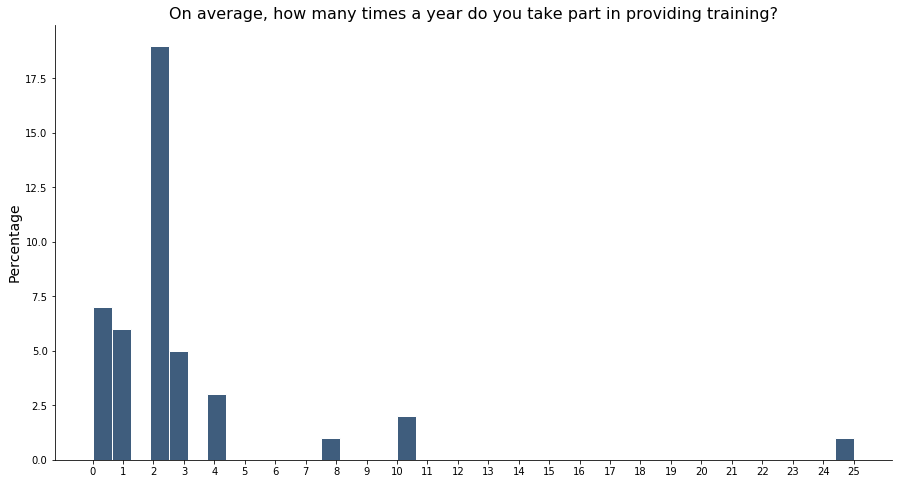

In [90]:
_ = get_plot(v_to_count, "freenumeric")

### What training programs are you involved with (comma separated list) (For example, Software Carpentry, local university training, etc.)

In [91]:
 wc = wordcloud(df, ['train3. What training programs are you involved with (comma separated list) (For example, Software Carpentry, local university training, etc.)'])

(-0.5, 1499.5, 799.5, -0.5)

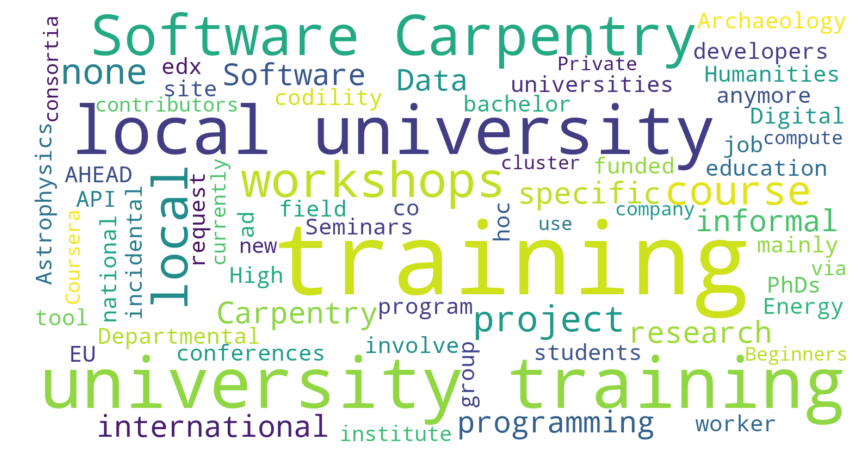

In [92]:
 plt.imshow(wc, interpolation='bilinear')
 plt.axis("off")

# Section 6. Publications

RSEs is an hybrid role between a researcher and a software developer. We investigated both of these aspects concerning publication and dissemination of their work, one on the traditional aspect of it (publications and conference) and on the more software aspect (open source and DOI).
One essential aspect of career in academia is the publications and the conferences to gain recognition. However, the role of RSE being less about writing articles than creating the infrastructure and the software for the article to exist, there is some fear that they will fail to have recognition through the papers and conferences.
Our results support this idea, while for 95% of the participants, their software is used in published researches they are only 77% (among them) who are acknowledged in the publication.

Among these participants that are acknowledged in the paper, only 33% are generally named as main author for the paper. Among the 67% of those who are not main author, 78% are at least mentioned as co-authors. And among these last 22% of RSEs that are not mentioned as co-author or main author, 90% are at least generally acknowledged in the main text of the paper.
On conference, the number of RSEs that present their work in conference is also high. 79% of these RSEs have presented in conference or workshop. 

One important development practice is how the code is distributed and if the RSEs are releasing their work under open licence.
We asked the participants if they have ever released their work under open source licence and 85% of them replied by the affirmative. It is seems that they mainly doing it all the time (44%), followed by the score 9 on the 10 item scale (16%). Therefore, as soon as the step to open source is done, it seems that RSEs seems a constant interest in it. However, they rarely use a Digital Object Identifier (DOI) to help to identify their software, only 31% of them are doing it. And the frequency of use of the DOI among them is much more variable than for the open licence.


### Has your software contributed to research that has been published in a journal or at a conference?; In general, when your software contributes to a paper, are you acknowledged in that paper?; Are you generally named as the main author of the paper?; Are you generally named as a co-author of the paper?; Are you generally acknowledged in the main text of the paper?

In [93]:
v_to_count, filename  = get_count(df, ['paper1. Has your software contributed to research that has been published in a journal or at a conference?', 'paper2. In general, when your software contributes to a paper, are you acknowledged in that paper?', 'paper3. Are you generally named as the main author of the paper?', 'paper4. Are you generally named as a co-author of the paper?', 'paper5. Are you generally acknowledged in the main text of the paper?'], "y/n/na", "./../survey_creation/2017/nl/listAnswers/.csv", "False", "./2017/nl/output/")

In [94]:
perc_to_count = get_percentage(v_to_count, filename)

In [95]:
display_side_by_side(v_to_count,perc_to_count)

,Yes [Count],No [Count],NaN value,Yes [Percentage],No [Percentage]
Publications,,,,,
Has your software contributed to research that has been published in a journal or at a conference?,71,4,2,95.0,5.0
"In general, when your software contributes to a paper, are you acknowledged in that paper?",58,17,2,77.0,23.0
Are you generally named as the main author of the paper?,19,39,19,33.0,67.0
Are you generally named as a co-author of the paper?,35,4,38,90.0,10.0
Are you generally acknowledged in the main text of the paper?,2,2,73,50.0,50.0


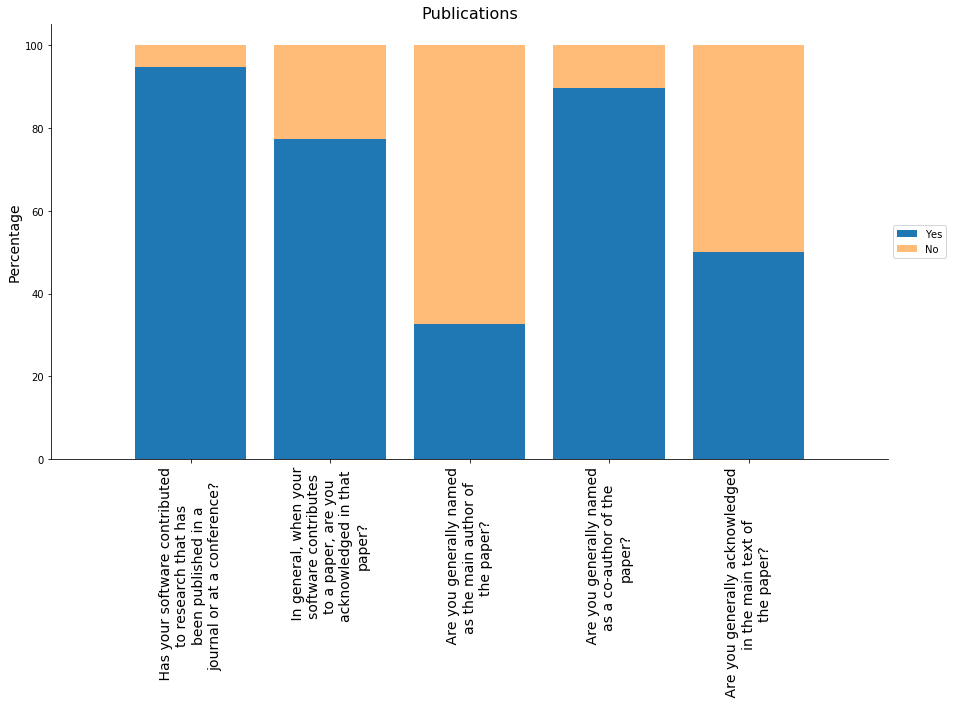

In [96]:
_ = get_plot(perc_to_count, "y/n/na")

### Have you ever presented your software work at a conference or workshop?

In [97]:
v_to_count, filename  = get_count(df, ['conf1can. Have you ever presented your software work at a conference or workshop?'], "y/n/na", "./../survey_creation/2017/nl/listAnswers/.csv", "False", "./2017/nl/output/")

In [98]:
perc_to_count = get_percentage(v_to_count, filename)

In [99]:
display_side_by_side(v_to_count,perc_to_count)

,Yes [Count],No [Count],NaN value,Yes [Percentage],No [Percentage]
Have you ever presented your software work at a conference or workshop?,,,,,
Have you ever presented your software work at a conference or workshop?,59,16,2,79.0,21.0


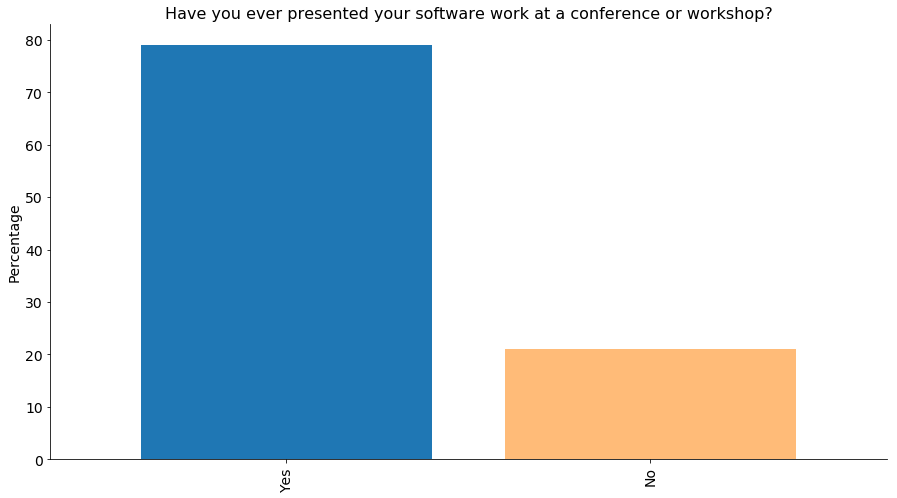

In [100]:
_ = get_plot(perc_to_count, "y/n/na")

## Open source

### Have you ever released your software under an open-source licence?

In [101]:
v_to_count, filename  = get_count(df, ['open01can. Have you ever released your software under an open-source licence?'], "y/n/na", "./../survey_creation/2017/nl/listAnswers/.csv", "False", "./2017/nl/output/")

In [102]:
perc_to_count = get_percentage(v_to_count, filename)

In [103]:
display_side_by_side(v_to_count,perc_to_count)

,Yes [Count],No [Count],NaN value,Yes [Percentage],No [Percentage]
Have you ever released your software under an open-source licence?,,,,,
Have you ever released your software under an open-source licence?,64,11,2,85.0,15.0


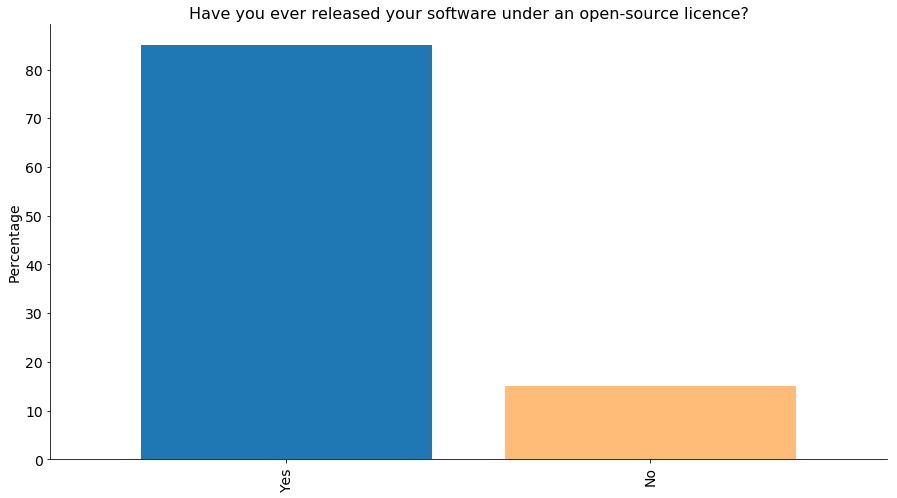

In [104]:
_ = get_plot(perc_to_count, "y/n/na")

### How often do you release the software projects you've worked on under an open-source licence?

In [105]:
v_to_count, filename  = get_count(df, ["open1can[SQ001]. How often do you release the software projects you've worked on under an open-source licence? []"], "likert", "./../survey_creation/2017/nl/listAnswers/likert_time_10.csv", "True", "./2017/nl/output/")

In [106]:
perc_to_count = get_percentage(v_to_count, filename)

In [107]:
display_side_by_side(v_to_count,perc_to_count)

,Count,Percentage
How often do you release the software projects you've worked on under an open-source licence?,,
1 (None at all),NaN,0.0
2,6.0,9.0
3,3.0,5.0
4,3.0,5.0
5,1.0,2.0
6,1.0,2.0
7,6.0,9.0
8,6.0,9.0
9,10.0,16.0


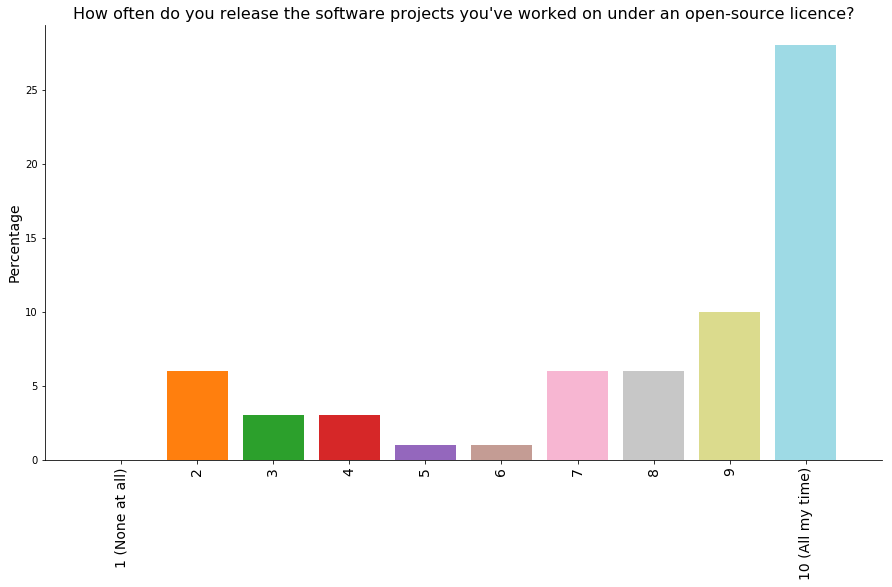

In [108]:
_ = get_plot(v_to_count, "likert")

### Have you ever used a Digital Object Identifier (DOI) to identify your software?

In [109]:
v_to_count, filename  = get_count(df, ['open03can. Have you ever used a Digital Object Identifier (DOI) to identify your software?'], "y/n/na", "./../survey_creation/2017/nl/listAnswers/.csv", "False", "./2017/nl/output/")

In [110]:
perc_to_count = get_percentage(v_to_count, filename)

In [111]:
display_side_by_side(v_to_count,perc_to_count)

,Yes [Count],No [Count],NaN value,Yes [Percentage],No [Percentage]
Have you ever used a Digital Object Identifier (DOI) to identify your software?,,,,,
Have you ever used a Digital Object Identifier (DOI) to identify your software?,23,52,2,31.0,69.0


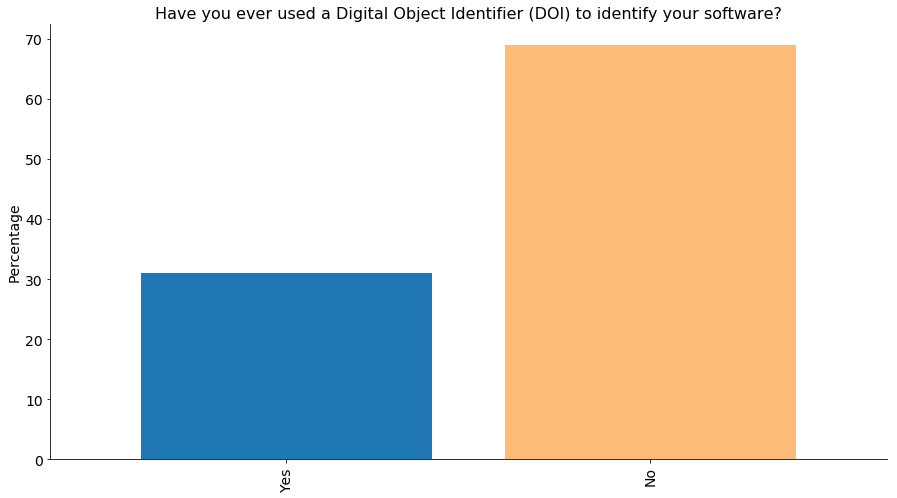

In [112]:
_ = get_plot(perc_to_count, "y/n/na")

### How often do you associate your software with a Digital Object Identifier (DOI)?

In [113]:
v_to_count, filename  = get_count(df, ['open3can[SQ001]. How often do you associate your software with a Digital Object Identifier (DOI)? []'], "likert", "./../survey_creation/2017/nl/listAnswers/likert_time_10.csv", "False", "./2017/nl/output/")

In [114]:
display(v_to_count) 

,open3can[SQ001]. How often do you associate your software with a Digital Object Identifier (DOI)? []
How often do you associate your software with a Digital Object Identifier (DOI)?,
1 (None at all),1.0
2,4.0
3,4.0
4,1.0
5,2.0
6,2.0
7,3.0
8,5.0
9,NaN


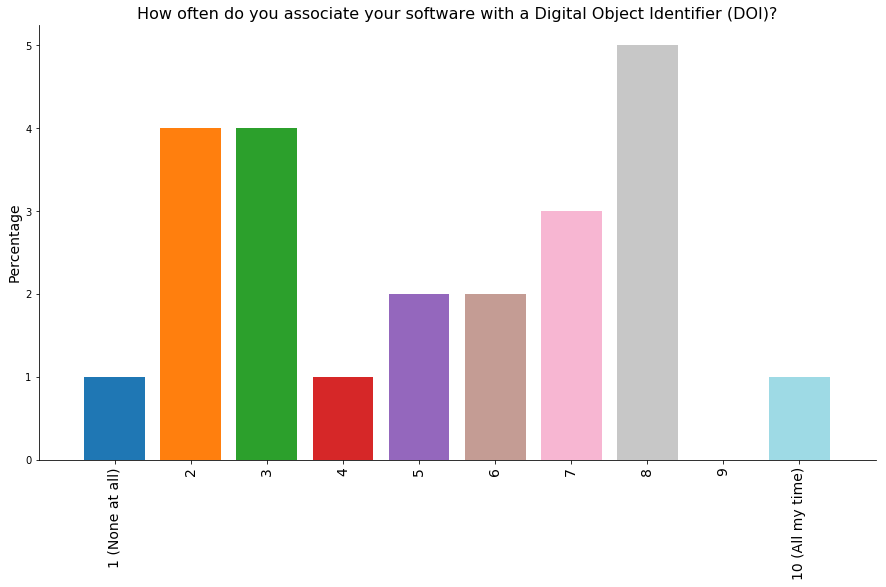

In [115]:
_ = get_plot(v_to_count, "likert")

## Section 7. Sustainability

This section comprises two subsections that focus on the technical and development aspects of the RSEs' work. They aim to understand good practices in developing software and which tools are important for RSEs.

Developing software requires a set of good practices to ensure the quality of the subsequent analysis as well as the robustness of the developed software, to name a few of important aspects. We wanted to see if the implementation of some simple but essential good practices were a reality. Three measures were created, the implementation of testing, the bus factor and the technical hand over plan.
These metrics allows to see the importance of the RSEs role in their team but also if they are themselves implementing some practices that are used widely in industry but less in academic research.

We asked the participants to choose any of the following testing methods:
* Test engineers conduct testing
* Developers conduct testing
* Users conduct testing
* No formal testing

Obviously, the *test engineers conduct testing* is the most potential testing method but may not be possible in number of small projects while, no formal testing should not occur in any ideal scenario, regardless of the size of the project. Surprisingly, 13% of the participants confessed they were not implementing any testing at all. It may seems a low number but we think it is still a high percentage considering the specific work of this population. When they are conducting testing, the RSEs seems to prefer (or only able to implement) *developer testing* (49% of them) or letting the users conduct the testing (32%), while the use of test engineers is marginal (6%).

We chose two broad measures to provide an insight into sustainability: the bus factor and technical hand over planning. The bus factor is a measure of the number of developers who understand a specific software project and could, with only a cursory review of the project, maintain or extend the code. A project with a bus factor of 1 is completely reliant on only one developer. If this developer finds new employment, becomes ill or is hit by the titular bus, then the project will fail. A high bus factor provides some confidence that the project can be sustained even if a developer leaves. A technical hand over plan is used to introduce a new developer to a software project. These plans cover basic information, such as the licence and location of the software, a repository, a description of the software architecture, a summary of development plans and any other information that a new developer would need to understand the software. A project that has written (and maintained) a technical hand over plan can withstand the departure of a developer, even a key developer, significantly better than one without such a plan.

On majority of the RSEs' projects the bus factor is 1 (45%), followed by a bus factor of 2 (27%). Higher bus factors are marginal with only 19% of the projects having a bus factor of 3, 3% of a bus factor of 4 and 7 % a bus factor equal or higher than 5. However, the presence of a technical plan, which can mitigate the low bus factor in the different projects is really low (21%) and presents a risk of project failures.

## Good practices

### In general, what sort of testing do you conduct on your software? (check all that apply)

In [116]:
v_to_count, filename  = get_count(df, ['proj4can[1]. In general, what sort of testing do you conduct on your software? (check all that apply) [No formal testing]', 'proj4can[2]. In general, what sort of testing do you conduct on your software? (check all that apply) [Developers conduct testing]', 'proj4can[3]. In general, what sort of testing do you conduct on your software? (check all that apply) [test engineers conduct testing]', 'proj4can[4]. In general, what sort of testing do you conduct on your software? (check all that apply) [Users conduct testing]'], "multiple choices", "./../survey_creation/2017/nl/listAnswers/testing.csv", "False", "./2017/nl/output/")

In [117]:
perc_to_count = get_percentage(v_to_count, filename)

In [118]:
display_side_by_side(v_to_count,perc_to_count)

,Count,Percentage
"In general, what sort of testing do you conduct on your software? (check all that apply)",,
Developers conduct testing,65,49.0
Users conduct testing,43,32.0
No formal testing,17,13.0
test engineers conduct testing,8,6.0


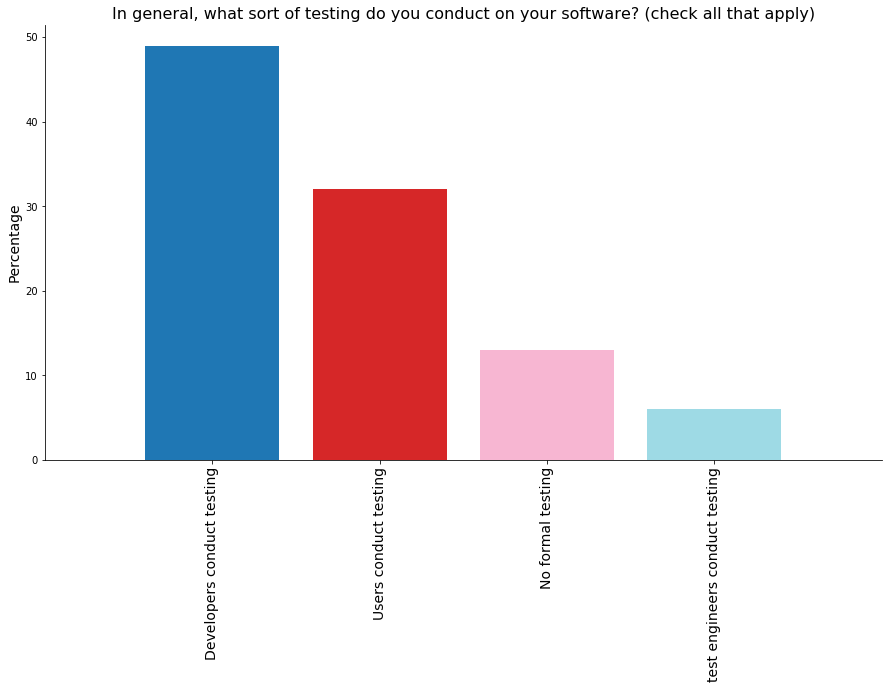

In [119]:
_ = get_plot(perc_to_count, "multiple choices")

### What is the bus factor of your most important software project? (the bus factor is the number of team members who if run over by a bus would put the project in jeopardy so 1 means the project is dependent on a single person)

In [120]:
v_to_count, filename  = get_count(df, ['stability1. What is the bus factor of your most important software project? (the bus factor is the number of team members who if run over by a bus would put the project in jeopardy so 1 means the project is dependent on a single person)'], "one choice", "./../survey_creation/2017/nl/listAnswers/bus_factor.csv", "True", "./2017/nl/output/")

In [121]:
perc_to_count = get_percentage(v_to_count, filename)

In [122]:
display_side_by_side(v_to_count,perc_to_count)

,Count,Percentage
What is the bus factor of your most important software project? (the bus factor is the number of team members who if run over by a bus would put the project in jeopardy so 1 means the project is dependent on a single person),,
1,34,45.0
2,20,27.0
3,14,19.0
4,2,3.0
5+,5,7.0
NaN,2,NaN


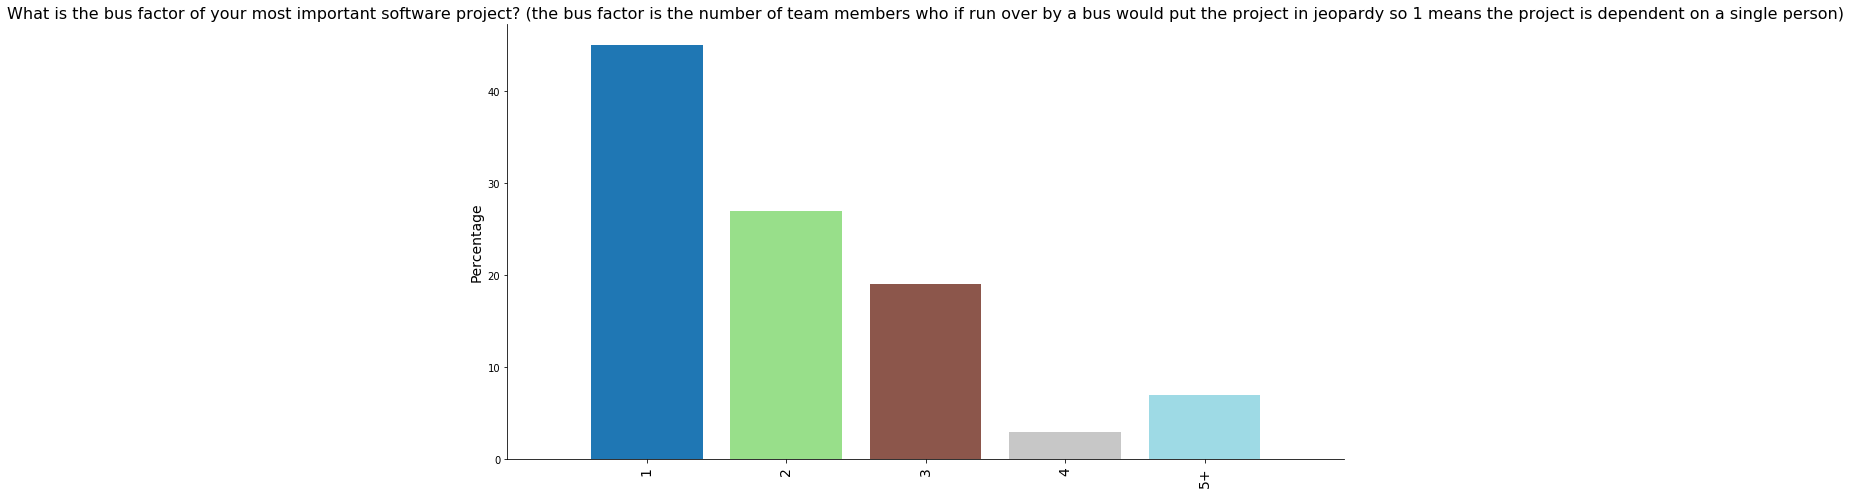

In [123]:
_ = get_plot(perc_to_count, "one choice")

### Is there a technical hand-over plan for your most important software project?

In [124]:
v_to_count, filename  = get_count(df, ['stability2. Is there a technical hand-over plan for your most important software project?'], "y/n/na", "./../survey_creation/2017/nl/listAnswers/.csv", "False", "./2017/nl/output/")

In [125]:
perc_to_count = get_percentage(v_to_count, filename)

In [126]:
display_side_by_side(v_to_count,perc_to_count)

,Yes [Count],No [Count],NaN value,Yes [Percentage],No [Percentage]
Is there a technical hand-over plan for your most important software project?,,,,,
Is there a technical hand-over plan for your most important software project?,16,59,2,21.0,79.0


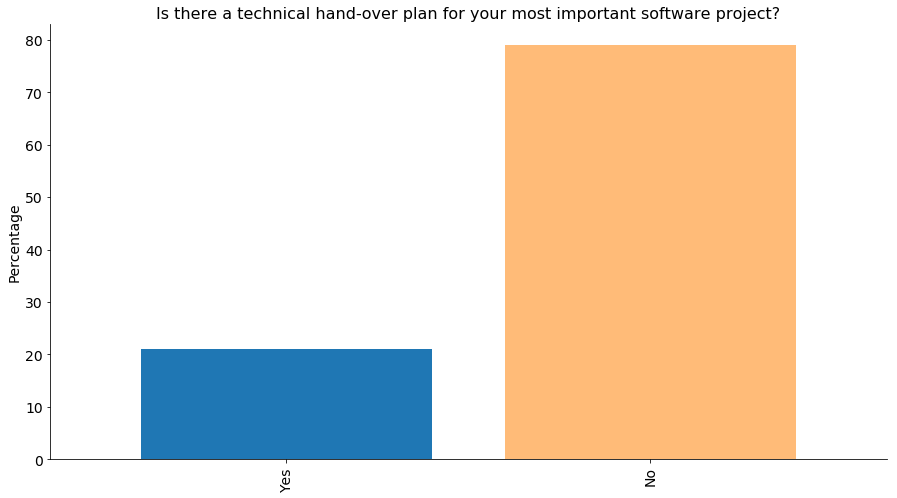

In [127]:
_ = get_plot(perc_to_count, "y/n/na")

# Section 8. Job satisfaction

The job satisfaction is an essential pulse to take about a community's health. It helps to track the evolution and the current state of the RSEs within their role and to catch any sign of structural or organisational dysfunction that are translated into well-being. There are a lot of different metrics to measure the quality of a job on a personal and psychological level [1]. Several models exist to understand the link between different factors of job satisfaction and turnover intention [2]–[6]. Turnover intention is an important measure that is highly associated with the risk of employees leaving the organisation [3]. Job satisfaction is important in retaining RSEs. Perceived employability provides information on how workers values their own skills in regard of the market. To measure the different attitudes toward the RSE role, we used scales that have been created in [5], [6], [7], [8]. These are Likert scale [7], which are 5 point ordinal scales graduated from Strongly disagree to Strongly agree. Each scale is composed of several so called items (i.e. questions) that each measure one attitude.

Beside these specific concepts we asked more general question about their satisfaction in their current position and their satisfaction with their career in general with a range of answers from *0 - Not at all satisfied* to *10 - Completely satisfied*, 79% of the participants answered more than 5 to the scale (which can be considered as a neutral position) to the question about their satisfaction about their current position. For the question about their satisfaction with their career in general (and using the same scale), 71% of the participants answered more than 5 to the scale.

The specific questions about their job satisfaction reflect, in general, the same opinion as the two more generic questions. However, the granularity helps to identify a couple of issues that would not appears with generic questions:

* *The feedback about the performance*: These questions ask if the RSEs feel that they receive enough information about their work and their performance. While they seems to have enough information about the purpose of their work and having access to sufficient data and information, they are less assertive about the feedback they receive from their colleagues and their supervisors.

* *The turnover intention*: These questions aim to measure the desire to quit their current position. Overall, the participants are not willing to leave their position and are not necessarily searching for other job, even if the potential job would offer the same compensations.

* *The perceived employability*: This concept is linked to the previous one. People may not have the intention to leave their jobs, not because they like it, but because they fear they are not employable. This is not the case here, the participants consider themselves more often employable than not.

* *The affective recognition*: This concept try to see if the participants receive positive feedback from their supervisors. Overall, again the participants report a positive relation with their supervisors. It means they are not systematic issues with direct management.

* *Affective satisfaction*: Here, the concept measures how much the participants enjoy and like their job. The answers were positive and again, reflect the answers given at the more generic questions.

* *The possibility of progression*: This question aims to study the possibility of evolution for the RSEs, if information is available and if they see a possibility of evolution within their current career. This is the only questions that clearly received negative answers. To summarise, even if the RSEs have planned to be in this position, as a part of their career plan, the majority of them think they cannot be promoted in their current group, neither the information for such progression is easily accessible. Moreover, they do not think that in their career plan there is a lot of opportunities. 

### References

* [1] B. Aziri, “Job satisfaction: A literature review,” vol. 3, no. 4, pp. 77–86.
* [2] N. De Cuyper, S. Mauno, U. Kinnunen, and A. Mkikangas, “The role of job resources in the relation between perceived employability and turnover intention: A prospective two-sample study,” vol. 78, no. 2, pp. 253–263.
* [3] A. B. Bakker and E. Demerouti, “The job demands-resources model: State of the art,” vol. 22, no. 3, pp. 309–328.
* [4] G. H. L. Cheng and D. K. S. Chan, “Who Suffers More from Job Insecurity? A Meta-Analytic Review.” vol. 57, no. 2, p. 272.
* [5] E. R. Thompson and F. T. Phua, “A brief index of affective job satisfaction,” vol. 37, no. 3, pp. 275–307.
* [6] L. Greenhalgh and Z. Rosenblatt, “Job insecurity: Toward conceptual clarity,” pp. 438–448.
* [7] R. Likert, “A technique for the measurement of attitudes.” vol. 22, no. 140, p. 55.

## General satisfaction

### In general, how satisfied are you with [Your current position]; In general, how satisfied are you with [Your career]

In [128]:
v_to_count, filename  = get_count(df, ['likert5[satisgen1]. [In general, how satisfied are you with [Your current position]]', 'likert5[satisgen2]. [In general, how satisfied are you with [Your career]]'], "likert", "./../survey_creation/2017/nl/listAnswers/likert_satisfied_10.csv", "False", "./2017/nl/output/")

In [129]:
display(v_to_count) 

,"In general, how satisfied are you with","In general, how satisfied are you with"
General satisfaction,,
0 - Not at all satisfied,2.0,2.0
1,NaN,NaN
2,1.0,2.0
3,1.0,1.0
4,2.0,3.0
5,3.0,2.0
6,4.0,5.0
7,18.0,22.0
8,30.0,23.0


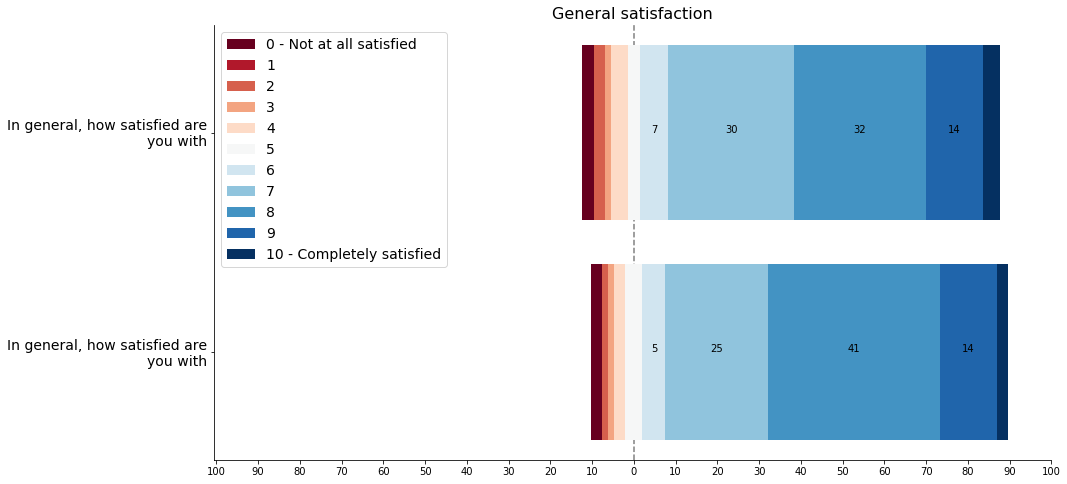

In [130]:
_ = get_plot(v_to_count, "likert")

## Feedback about performance

### Do you receive sufficient information on the results of your work?; Does your work give you the opportunity to check on how well you are doing your work?; In your work, do you have access to sufficient data and information?; Do you receive sufficient information on the purpose of your work?; Does your work provide you with direct feedback on how well you are doing your work?; Does your supervisor/line manager inform you about how well you are doing your work?; Do your colleagues inform you about how well you are doing your work?

In [131]:
v_to_count, filename  = get_count(df, ['likert1[perfCheck1]. [Do you receive sufficient information on the results of your work?]', 'likert1[perfCheck2]. [Does your work give you the opportunity to check on how well you are doing your work?]', 'likert1[perfCheck3]. [In your work, do you have access to sufficient data and information?]', 'likert1[perfCheck4]. [Do you receive sufficient information on the purpose of your work?]', 'likert1[perfCheck5]. [Does your work provide you with direct feedback on how well you are doing your work?]', 'likert1[perfCheck6]. [Does your supervisor/line manager inform you about how well you are doing your work?]', 'likert1[perfCheck7]. [Do your colleagues inform you about how well you are doing your work?]'], "likert", "./../survey_creation/2017/nl/listAnswers/likert_time_5.csv", "False", "./2017/nl/output/")

In [132]:
display(v_to_count) 

,Do you receive sufficient information on the results of your work?,Does your work give you the opportunity to check on how well you are doing your work?,"In your work, do you have access to sufficient data and information?",Do you receive sufficient information on the purpose of your work?,Does your work provide you with direct feedback on how well you are doing your work?,Does your supervisor/line manager inform you about how well you are doing your work?,Do your colleagues inform you about how well you are doing your work?
,,,,,,,
Never,2,8,1,NaN,4,7,3
Sometimes,28,23,9,8.0,31,26,29
Often,24,26,24,18.0,21,21,27
Very Often,14,12,31,30.0,12,14,8
Always,5,4,8,17.0,5,5,6


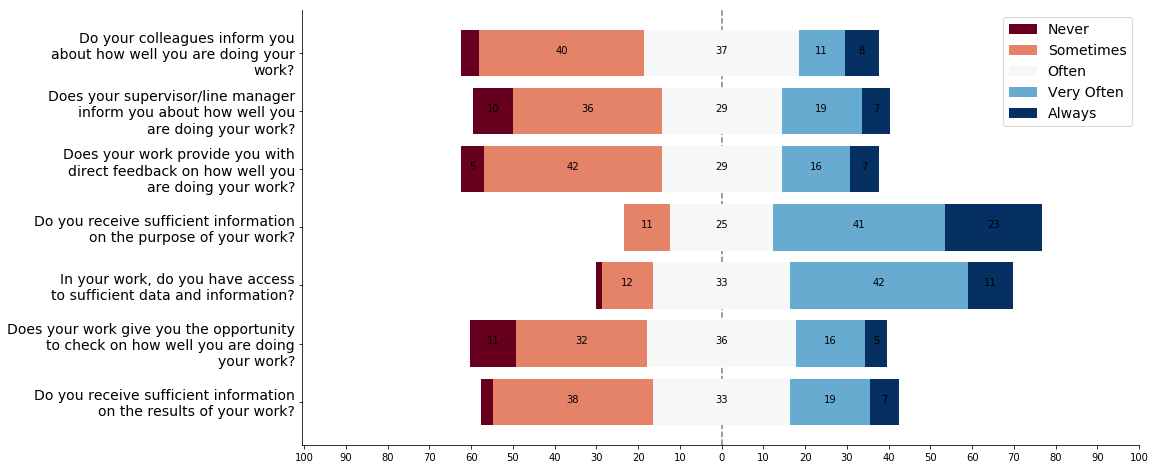

In [133]:
_ = get_plot(v_to_count, "likert")

## Turnover intention

### How often do you look forward to another day at work?; How often do you dream about getting another job that will better suit your needs?

In [134]:
v_to_count, filename  = get_count(df, ['likert3[turnOver2]. [How often do you look forward to another day at work?]', 'likert3[turnOver4]. [How often do you dream about getting another job that will better suit your needs?]'], "likert", "./../survey_creation/2017/nl/listAnswers/likert_time_5.csv", "False", "./2017/nl/output/")

In [135]:
display(v_to_count) 

,How often do you look forward to another day at work?,How often do you dream about getting another job that will better suit your needs?
,,
Never,8.0,16
Sometimes,35.0,36
Often,30.0,10
Very Often,NaN,7
Always,NaN,4


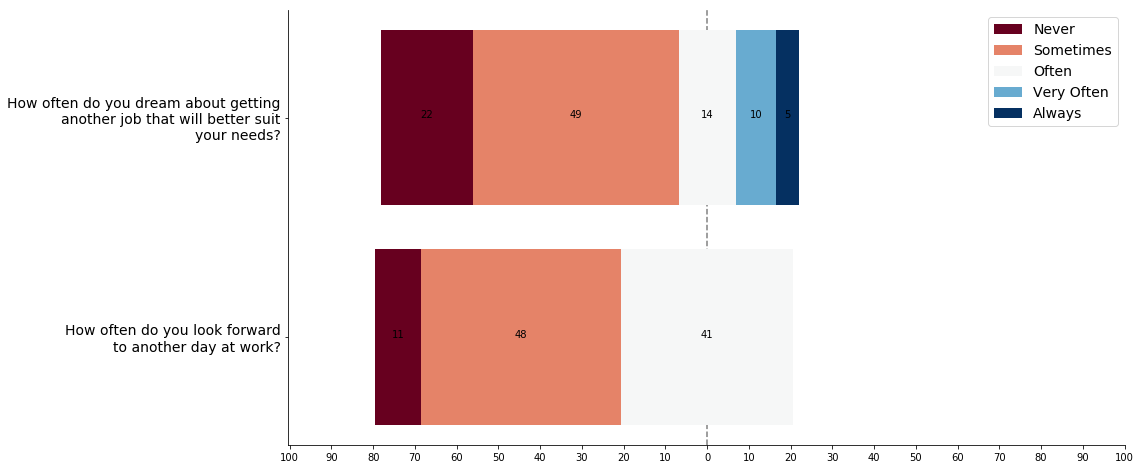

In [136]:
_ = get_plot(v_to_count, "likert")

## Perceived Employability

### It would not be very difficult for me to get an equivalent job in a different organisation; I can think of a number of organisations that would probably offer me a job; My experience is in demand on the labour market; Given my qualifications and experience, getting a new job would not be very hard at all

In [137]:
v_to_count, filename  = get_count(df, ['likert4[percEmp1]. [It would not be very difficult for me to get an equivalent job in a different organisation]', 'likert4[percEmp2]. [I can think of a number of organisations that would probably offer me a job]', 'likert4[percEmp3]. [My experience is in demand on the labour market]', 'likert4[percEmp4]. [Given my qualifications and experience, getting a new job would not be very hard at all]'], "likert", "./../survey_creation/2017/nl/listAnswers/likert_agree.csv", "False", "./2017/nl/output/")

In [138]:
display(v_to_count) 

,It would not be very difficult for me to get an equivalent job in a different organisation,I can think of a number of organisations that would probably offer me a job,My experience is in demand on the labour market,"Given my qualifications and experience, getting a new job would not be very hard at all"
,,,,
Strongly disagree,3,1,1,1
Disagree,14,3,4,4
Neither agree or disagree,23,24,10,14
Agree,26,35,40,37
Strongly Agree,7,10,18,17


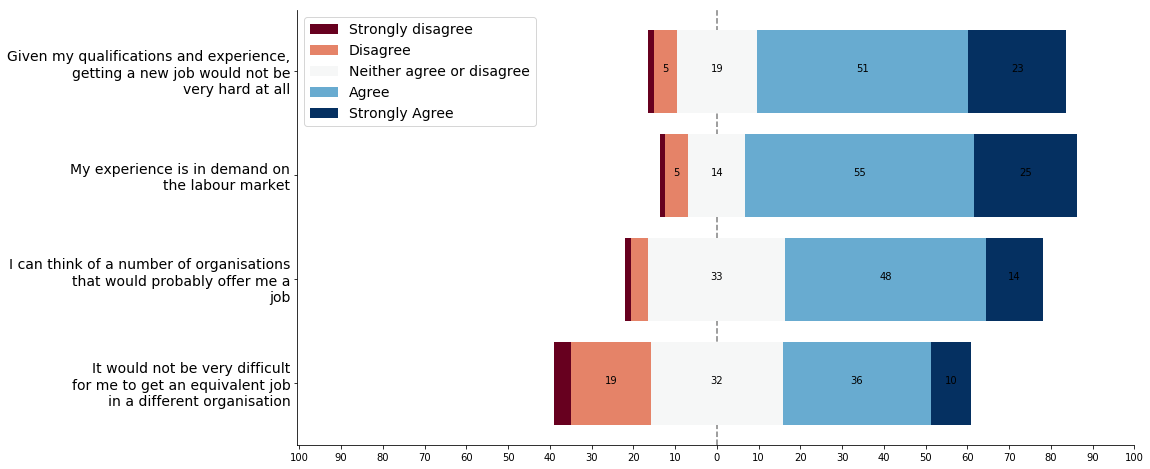

In [139]:
_ = get_plot(v_to_count, "likert")

## Affective recognition

### I am satisfied with my supervisor/line manager's confidence in me; I am satisfied with the recognition I receive from my supervisor/line manager for doing my job

In [140]:
v_to_count, filename  = get_count(df, ["likert4[affRec1]. [I am satisfied with my supervisor/line manager's confidence in me]", 'likert4[affRec3]. [I am satisfied with the recognition I receive from my supervisor/line manager for doing my job]'], "likert", "./../survey_creation/2017/nl/listAnswers/likert_agree.csv", "False", "./2017/nl/output/")

In [141]:
display(v_to_count) 

,I am satisfied with my supervisor/line manager's confidence in me,I am satisfied with the recognition I receive from my supervisor/line manager for doing my job
Affective recognition,,
Strongly disagree,4,6
Disagree,3,5
Neither agree or disagree,10,13
Agree,40,37
Strongly Agree,16,12


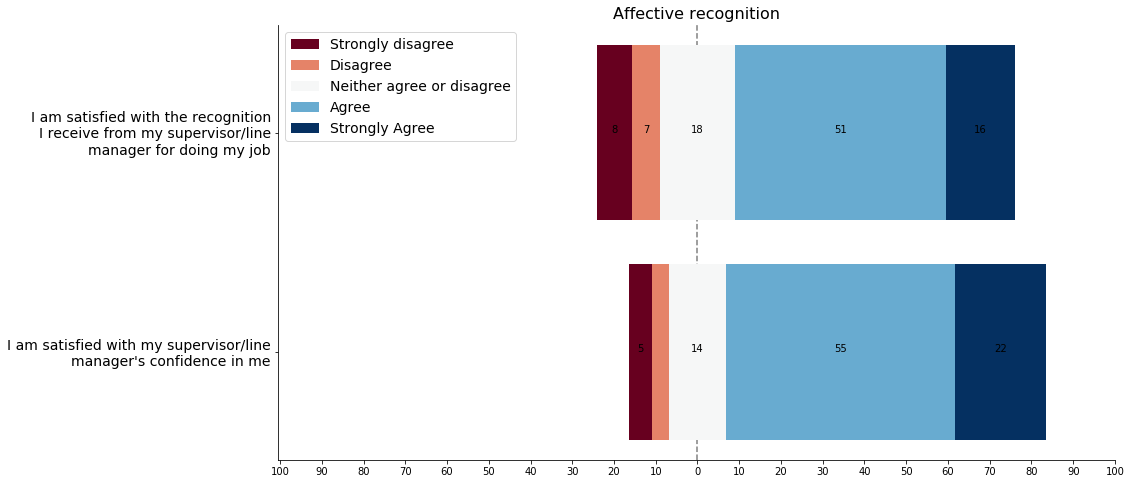

In [142]:
_ = get_plot(v_to_count, "likert")

## Affective satisfaction

### I find real enjoyment in my job; Most days I am enthusiastic about my job

In [143]:
v_to_count, filename  = get_count(df, ['likert4[affSat1]. [I find real enjoyment in my job]', 'likert4[affSat2]. [Most days I am enthusiastic about my job]'], "likert", "./../survey_creation/2017/nl/listAnswers/likert_agree.csv", "False", "./2017/nl/output/")

In [144]:
display(v_to_count) 

,I find real enjoyment in my job,Most days I am enthusiastic about my job
,,
Strongly disagree,2,3
Disagree,1,3
Neither agree or disagree,6,4
Agree,45,47
Strongly Agree,19,16


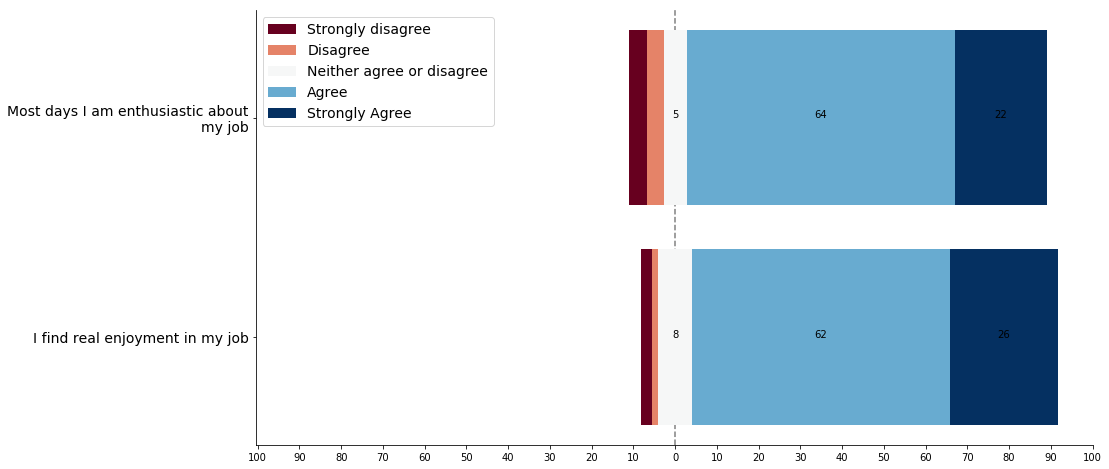

In [145]:
_ = get_plot(v_to_count, "likert")

## Possibility of progression

### It is likely that I will gain a promotion within my current group; The process I have to complete to gain a promotion is clear and understandable; There are many opportunities within my chosen career plan; My current position is an integral part of my career plan; It is likely that my next position will be an RSE role

In [146]:
v_to_count, filename  = get_count(df, ['likert2[progRSE1]. [It is likely that I will gain a promotion within my current group]', 'likert2[progRSE2]. [The process I have to complete to gain a promotion is clear and understandable]', 'likert2[progRSE3]. [There are many opportunities within my chosen career plan]', 'likert2[progRSE4]. [My current position is an integral part of my career plan]', 'likert2[progRSE5]. [It is likely that my next position will be an RSE role]'], "likert", "./../survey_creation/2017/nl/listAnswers/likert_agree.csv", "False", "./2017/nl/output/")

In [147]:
display(v_to_count) 

,It is likely that I will gain a promotion within my current group,The process I have to complete to gain a promotion is clear and understandable,There are many opportunities within my chosen career plan,My current position is an integral part of my career plan,It is likely that my next position will be an RSE role
,,,,,
Strongly disagree,11,13,6,2,4
Disagree,16,30,17,9,11
Neither agree or disagree,33,18,23,13,36
Agree,11,10,22,31,17
Strongly Agree,2,2,5,18,4


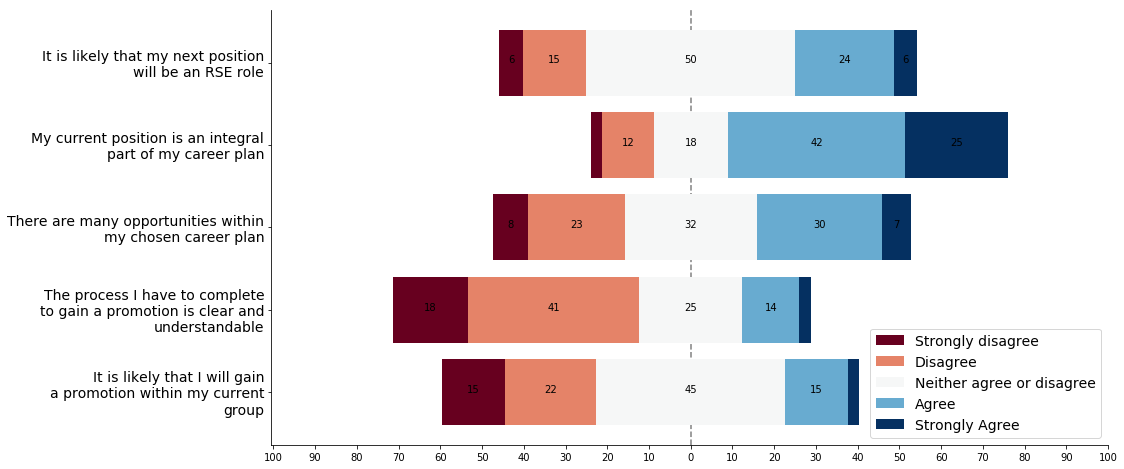

In [148]:
_ = get_plot(v_to_count, "likert")

# Section 9. Research Software Engineer

The last section was about the RSE network. It appears that the network is not really efficient yet. First, to the question where they meet other RSE. They mainly meet within local group/network (56%). Only a few do it through the NL-RSE Association (5%) or at the UK RSE Association/ Conference (4%). However, they are almost half of them (47%) member of the NL-RSE Association

## RSE Network

### How do you meet other RSEs?

In [149]:
v_to_count, filename  = get_count(df, ['ukrse2[1]. How do you meet other RSEs? [UK RSE Association / Conference]', 'ukrse2[2]. How do you meet other RSEs? [NL-RSE Association]', 'ukrse2[3]. How do you meet other RSEs? [Local group/network]', 'ukrse2[4]. How do you meet other RSEs? [N/A]'], "multiple choices", "./../survey_creation/2017/nl/listAnswers/ukrse_nl.csv", "False", "./2017/nl/output/")

In [150]:
perc_to_count = get_percentage(v_to_count, filename)

In [151]:
display_side_by_side(v_to_count,perc_to_count)

,Count,Percentage
How do you meet other RSEs?,,
Local group/network,42,56.0
N/A,26,35.0
NL-RSE Association,4,5.0
UK RSE Association / Conference,3,4.0


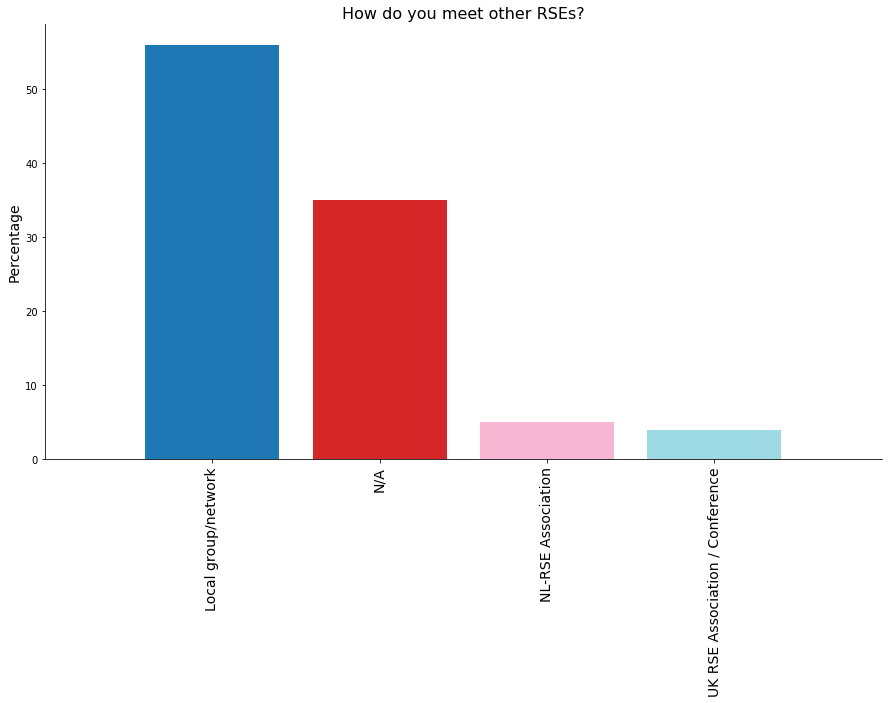

In [152]:
_ = get_plot(perc_to_count, "multiple choices")

### Are you a member of the NL-RSE Association? (Members are people who have signed up to the NL-RSE mailing list)

In [153]:
v_to_count, filename  = get_count(df, ['ukrse1. Are you a member of the NL-RSE Association? (Members are people who have signed up to the NL-RSE mailing list)'], "y/n/na", "./../survey_creation/2017/nl/listAnswers/.csv", "False", "./2017/nl/output/")

In [154]:
perc_to_count = get_percentage(v_to_count, filename)

In [155]:
display_side_by_side(v_to_count,perc_to_count)

,Yes [Count],No [Count],NaN value,Yes [Percentage],No [Percentage]
Are you a member of the NL-RSE Association? (Members are people who have signed up to the NL-RSE mailing list),,,,,
Are you a member of the NL-RSE Association? (Members are people who have signed up to the NL-RSE mailing list),28,32,17,47.0,53.0


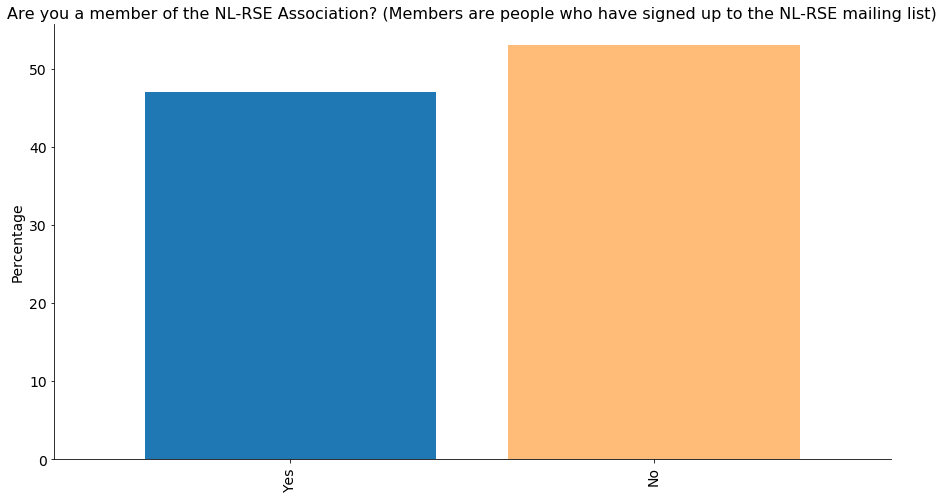

In [156]:
_ = get_plot(perc_to_count, "y/n/na")